# 1.About dataset

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Develop a Classification Model for determining price range based on features available. Dataset as 21 features and 2000 entries. The meanings of the features are given below.

# Attribute Information

battery_power: Total energy a battery can store in one time measured in mAh  #ghodrate batri     #numerical

blue: Has bluetooth or not   #bluetooth dare ya na?   #categorical

clock_speed: speed at which microprocessor executes instructions       # sorate pardazande     #numerical

dual_sim: Has dual sim support or not        # 2simkarte hast ya na?    #categorical

fc: Front Camera mega pixels      #dorbin jelo chand pixel       #numerical

four_g: Has 4G or not             # 4G hast ya na    #categorical

int_memory: Internal Memory in Gigabytes        # hafezeh dakhelish chand Gig     #numerical

m_dep: Mobile Depth in cm        # omghe goshi chand centimeter?           #numerical

mobile_wt: Weight of mobile phone      # vazne mobile cheghadre          #numerical

n_cores: Number of cores of processor       # tedad haste haye pardazandeye mobile? chand hastehii ast?    #numerical

pc: Primary Camera mega pixels              # dorbin asli chand pixel?       #categorical

px_height: Pixel Resolution Height         # mizane resolution dar rastaye ertefah  #numerical      

px_width: Pixel Resolution Width          # mizane resolution dar rastaye arz       #numerical

ram: Random Access Memory in Mega Byte      # ram chan mega byte?        #categorical

sc_h: Screen Height of mobile in cm         # ertefae screene mobile      #categorical

sc_w: Screen Width of mobile in cm          # arze screene mobile        #categorical

talk_time: longest time that a single battery charge will last when you are         #bishtarin zamani k ba yebar sharzhe batry mitavan sohbat kard.

three_g: Has 3G or not         # 3G dare ya na?      #categorical

touch_screen: Has touch screen or not      # Toch_screen dare ya na?        #categorical

wifi: Has wifi or not            #wifi dare ya na? #categorical

##Target##
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).  
#price_range : yani targete ma agar 0 = arun, 1 = motevaet, 2 = gerun, 3 = kheyli gerun


predict : DT, RF(Random Forest), SVM

# 2.Exploratory Data Analysis

2.1.import libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier    # or DecistinTreeRegressor : data peyvaste
from sklearn.ensemble import RandomForestClassifier    # or DecistinTreeRegressor : data peyvaste
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the Data Train
DATA_train= pd.read_csv("train.csv")
DATA_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# Read the Data
DATA_test= pd.read_csv("test.csv")
DATA_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [ ]:
DATA_train.head(10)   # 10 satre aval dataset train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
DATA_train.tail(10)     # 10 satre akhar dataset train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
DATA_test.head(10)   # 10 satre aval dataset test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [ ]:
DATA_test.tail(10)     # 10 satre akhar dataset test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
990,991,1807,0,1.2,0,4,0,37,0.8,162,...,11,246,932,2741,7,1,9,1,1,1
991,992,1797,1,2.6,0,4,0,42,0.6,174,...,20,57,1169,3359,16,6,18,1,1,1
992,993,1895,0,0.5,1,0,1,62,0.9,99,...,0,1019,1698,2563,10,8,13,1,0,1
993,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
994,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [ ]:
# dakhele data yek dataframe dorost mikonom k sari update beshe dar datafarame
# tabdile datasete "train" be dataframe
data_train = pd.DataFrame(DATA_train)
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data_train.shape     # tedade satr va sotun, 2000satr va 21 sotun

(2000, 21)

In [ ]:
data_train.info()  #etelaat data, non-null : yani miaaing value nadarad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# 2ta feature float va 19ta feature int

In [ ]:
pip install missingno    # nasbe ketabkhane "missingno" baraye baresi missing value

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


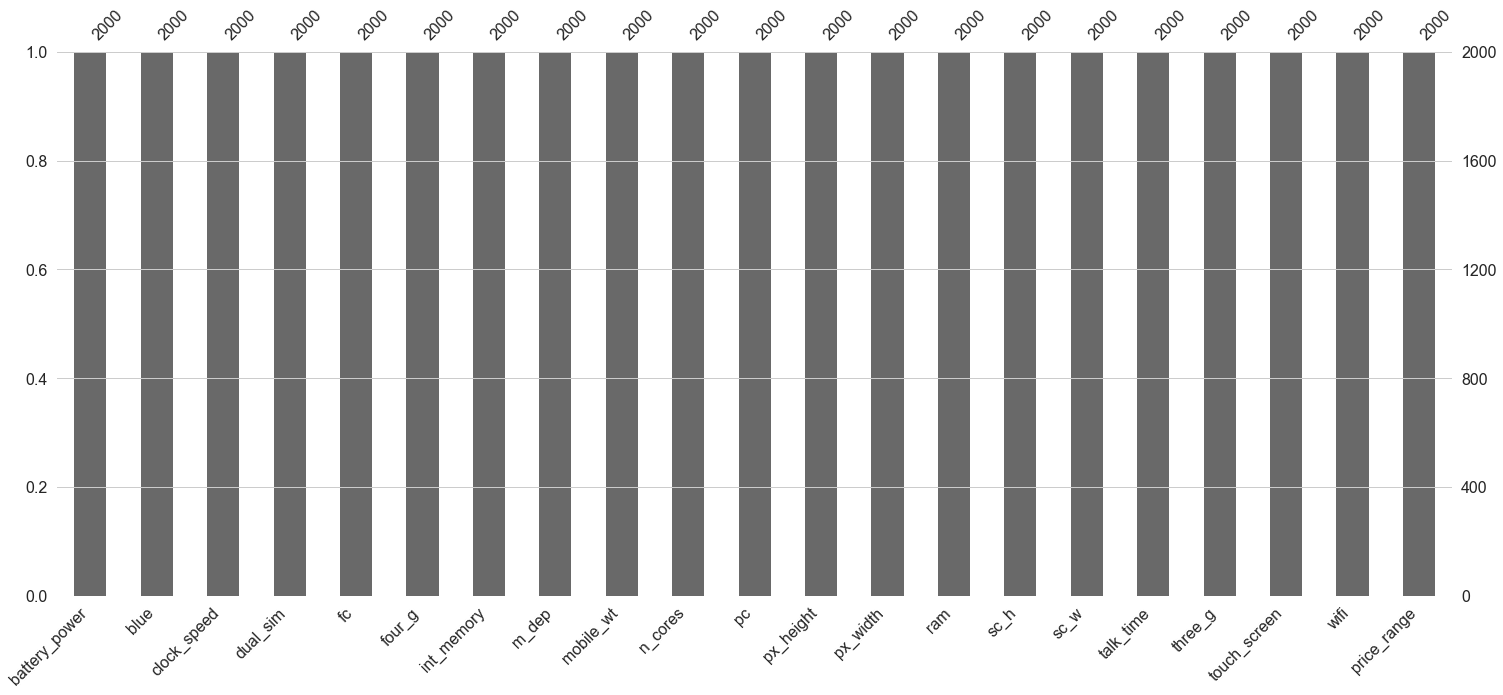

In [ ]:
# barresiye missing value dataframe train
#Now let's check if there are any missing values in the dataset.
import missingno as msno
msno.bar(data_train)
plt.show()

In [ ]:
# moshahede mishavad k tedade sample haye hame feature ha 2000tast va yeksanand pas missing value nadarad.

In [ ]:
# dakhele data yek dataframedorost mikonom k sari update beshe dar datafarame
## tabdile datasete "test" be dataframe
data_test = pd.DataFrame(DATA_test)
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


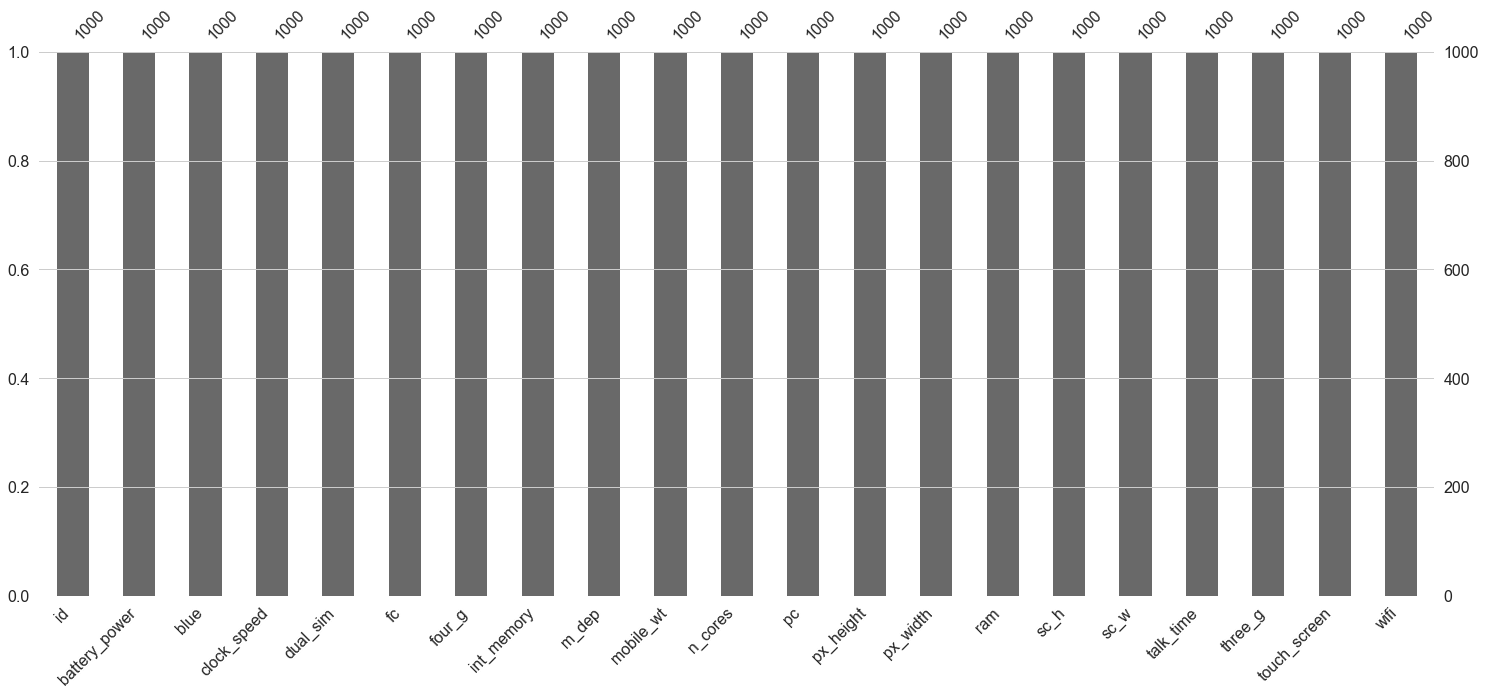

In [ ]:
# barresiye missing value dataframe test
#Now let's check if there are any missing values in the dataset.
import missingno as msno
msno.bar(DATA_test)
plt.show()

In [ ]:
# moshahede mishavad k tedade sample haye hame feature ha 1000tast va yeksanand pas missing value nadarad.

In [ ]:
data_test.shape            # dataframe test 1000satr va 21 sotun darad.

(1000, 21)

In [ ]:
data_test.info()  #etelaat data, non-null : yani miaaing value nadarad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
# datasete test mesle datasete trane 2 feature float va 19ta feature int darad.

In [ ]:
#chon dataste test va traine bayad featurehaye yeksan dashte bashand, feature "id" k faghat dar datasete test ast ra hazf mikonim.
# Targete price_range k dar datasete test nist ra be un ezafe mikonim.
data_test.drop(['id'], axis = 1, inplace = True)    # hazfe features "ID" az Dataset test
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
data_test.insert(20, "price_range",1)      #efzudane sotune price_range be dataset test
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,1
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,1
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,1


In [ ]:
# bad az hazfe feature "id" va add targete"price_range" baz ham datasete test, moshabe datasete train 21 sotun darad.
data_test.shape

(1000, 21)

In [ ]:
data_test.columns      # names feature datasete test

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Data Preparation

In [ ]:
data_train.columns      ## names feature datasete train

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#moshahede mishavad k datasete haye train va test dar name va tedade feature ha barabarand.

In [ ]:
# ghabl az tagghsim dataset be data numerical va categorical
# 2ta feature float va 19ta feature int
data_train.info()  #etelaat data, non-null : yani miaaing value nadarad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data_train['price_range'].unique()              #maghadire unique target 0 1 2 3 ast. yani target 4 class darad.

array([1, 2, 3, 0], dtype=int64)

In [ ]:
data_train.describe()       # barresi tedad, miyangin, minimom va maximom, enheraf meyar va....

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# moshahede mishavad k count dar hame features 2000.000000 ast pas motevaje mishavim k missing value nadarad.

In [ ]:
data_train.isnull().any()     # barresi mojadad mising value ya maghadire NAN

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [ ]:
# hame false yani missing value nadard.

In [ ]:
data_train.isnull().sum()   # barresi mojadad missing value featurs

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# hame sefr yani missing value nadard.

In [ ]:
#Data Visualization: taghsim features Numerical va Categorical

In [ ]:
#categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen', 'wifi']

In [ ]:
cols = set(data_train.columns)
cols_numeric = set(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range'])
cols_categorical = list(cols - cols_numeric)    # kole feature hara az feature haye numerical kam kon ta feature haye categorical bedast biyad.
cols_categorical

['four_g', 'wifi', 'touch_screen', 'three_g', 'dual_sim', 'blue']

In [ ]:
# cols_numeric : features numerical

In [ ]:
# tabdile noe feature haye int be categorical
for x in cols_categorical:
    data_train[x] = data_train[x].astype('category')

In [ ]:
data_train.info()   #etelaate data bad az taghsime data be num va cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

In [ ]:
# bad az tagghsim dataset be data numerical va categorical
# 6ta data categorical, 2ta feature float, 13ta feature int

In [ ]:
# namayeshe data numerical va categorical dar ghalebe arayeh
data_num = data_train.select_dtypes(include='number')
data_cat = data_train.select_dtypes(include='category')
print(f'Numerical Attributes: {list(data_num.columns)}')
print(f'Categorical Attributes: {list(data_cat.columns)}')

Numerical Attributes: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']
Categorical Attributes: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


In [ ]:
data_train.describe().transpose()    # barresi tedad, miyangin, minimom va maximom, enheraf meyar data numerical

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [ ]:
# Attribute Information

#battery_power: ghodrate batri      min = 501.0        max = 1998.0

#clock_speed: sorate pardazande     min = 0.5          max = 3.0

#fc: dorbin jelo chand pixel       min = 0.0 yani dorbin jelo nedarad.       max = 19.0

#int_memory: hafezeh dakhelish chand Gig     min = 2.0         max = 64.0

#m_dep: omghe goshi chand centimeter?        min = 0.1 cm        max = 1.0 cm

#mobile_wt: vazne mobile cheghadre           min = 80.0          max = 200.0

#n_cores: tedad haste haye pardazandeye mobile? chand hastehii ast?       min = 1 hateii    max = 8 hasteii

#pc: dorbin asli chand pixel?       min = 0 yani gushi dorbin nadard, gushi sade           max = 20 pixel

#px_height: mizane resolution dar rastaye ertefah         min = 0 nemishe k sefr bashe!!!      max =  1960     noise!!!!!!!

#px_width: mizane resolution dar rastaye arz       min = 500        max = 1998

#ram: Random Access Memory in Mega Byte      min = 256 megabyte        max = 3998 megabyte

#sc_h: ertefae screene mobile (cm)         min = 5          max = 19

#sc_w: arze screene mobile (cm)      min = 0 nemishe k arze screen 0 bashe!        max = 18        noise!!!!!!

#talk_time: bishtarin zamani k ba yebar sharzhe batry mitavan sohbat kard.       min = 19        max = 20

##Target##     min = 0         max = 3
#price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
#price_range : yani targete ma agar 0 = arun, 1 = motevaet, 2 = gerun, 3 = kheyli gerun


In [ ]:
#natije : ehtemale 2ta noise :
#sc_w: arze screene mobile        min = 0 nemishe k arze screen 0 bashe!        max = 18        noise!!!!!!
#px_height: mizane resolution dar rastaye ertefah         min = 0 nemishe k sefr bashe!!!      max =  1960     noise!!!!!!!

Univariate Analysis - Numerical Attributes
Let's construct a function that shows the summary and density distribution of a numerical attribute:

Numerical Attributes: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

#analyze numerical data ba rasme plot

In [ ]:
def summary(x):
    x_min = data_train[x].min()     # mohasebeye minimum
    x_max = data_train[x].max()     # mohasebeye maximum
    Q1 = data_train[x].quantile(0.25)   #25%    (darvaghe haman dataye describe ra mikhahim namayesh dahim.)
    Q2 = data_train[x].quantile(0.50)   #50%
    Q3 = data_train[x].quantile(0.75)   #75%
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(441)    # in adade dakhele parantez : size plathara kuchak va bozorg mikonad. bayad 3 raghami bashad.
# harche in adad be satmte kamtar masalan 221 beravad size plot bozorgtar va harche be samte bishtar 551 beravad size plot kuchetar mishavad.
    ax1 = sns.distplot(data_train[x], color = 'r')   # namayesh plot be surate distplot
    plt.title(f'{x.capitalize()} Density Distribution')   #titre plot: Density Distribution

    plt.subplot(442)
    ax2 = sns.violinplot(x = data_train[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(443)
    ax2 = sns.boxplot(x=data_train[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(444)
    ax3 = sns.kdeplot(data_train[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

5 Point Summary of Battery_power Attribute:
Battery_power(min) : 501
Q1                    : 851.75
Q2(Median)            : 1226.0
Q3                    : 1615.25
Battery_power(max) : 1998


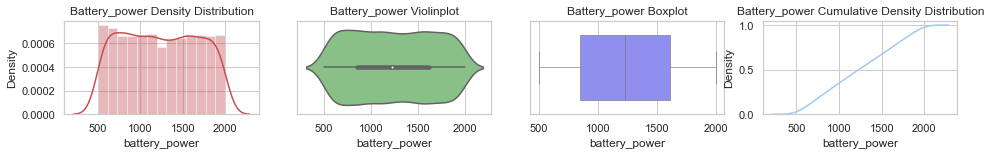

In [ ]:
summary('battery_power')    #ghodrate batri

In [ ]:
# ghodrate batri minimum 501 daghighe va maximum 1998 daghighe, betor miyangin 1226 daghighe ast.
# bazheye [501,1998]
# ghodrate batri aksaran beyne 851.75 ta 1615.25 ast.

5 Point Summary of Clock_speed Attribute:
Clock_speed(min) : 0.5
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.2
Clock_speed(max) : 3.0


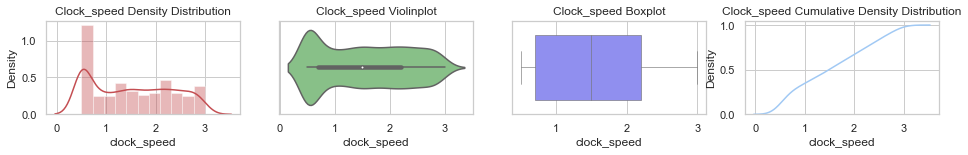

In [ ]:
summary('clock_speed')    #sorate pardazande

In [ ]:
# #sorate pardazande minimum 0.5 va maimum 3.0 , betor miyangin 1.5 ast.
# bazheye [0.5,3]
# sorate pardazandeye aksaran beyne 0.7 ta 2.2 ast.

5 Point Summary of Fc Attribute:
Fc(min) : 0
Q1                    : 1.0
Q2(Median)            : 3.0
Q3                    : 7.0
Fc(max) : 19


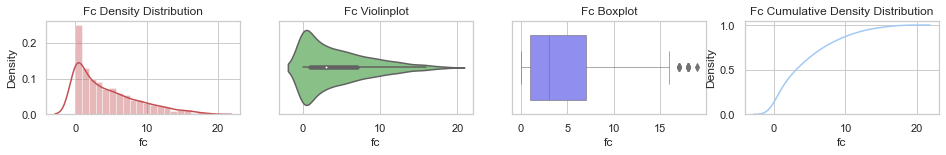

In [ ]:
summary('fc')    #dorbin jelo chand pixel

In [ ]:
#dorbin jelo gushi minimum 0 pixel va maimum 19 pixel , betor miyangin 3pixel ast.
# 0 pixel : yani gushi dorbin jelo nadarad.
# bazheye [0,19]
# dorbin jelo aksaran beyne 1 ta 7 pixel ast.

5 Point Summary of Int_memory Attribute:
Int_memory(min) : 2
Q1                    : 16.0
Q2(Median)            : 32.0
Q3                    : 48.0
Int_memory(max) : 64


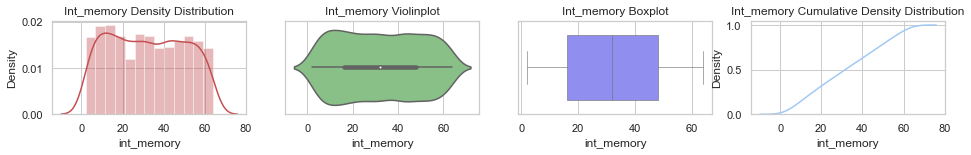

In [ ]:
summary('int_memory')    #hafezeh dakhelish chand Gig

In [ ]:
#hafezeh dakheliye gushi minimum 2 gig maximum 64 gig va betor miyangin 32 gig ast.
# yani beyne bazehye [2,64]
#aksaran beyne 16 ta 48 gig hafezeh dakheli darand.

5 Point Summary of M_dep Attribute:
M_dep(min) : 0.1
Q1                    : 0.2
Q2(Median)            : 0.5
Q3                    : 0.8
M_dep(max) : 1.0


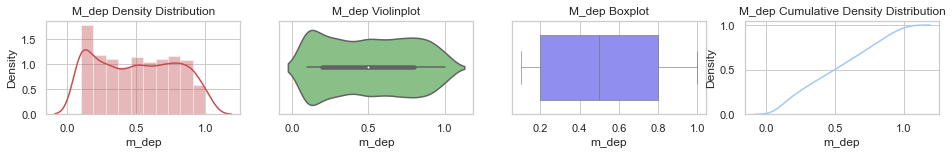

In [ ]:
summary('m_dep')    #omghe goshi chand centimeter?

In [ ]:
#omghe goshi minimum 0.1 centimeter va maximum 1 centimeter va betor miyangin 0.5 centimeter ast.
#bazeh [0.1,1]

5 Point Summary of Mobile_wt Attribute:
Mobile_wt(min) : 80
Q1                    : 109.0
Q2(Median)            : 141.0
Q3                    : 170.0
Mobile_wt(max) : 200


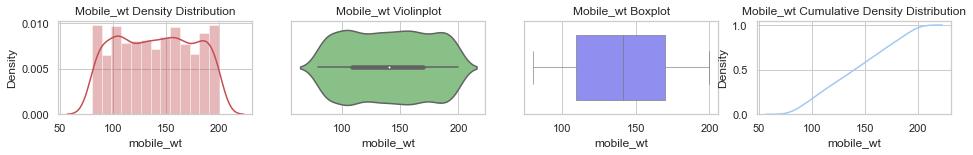

In [ ]:
summary('mobile_wt')    #vazne mobile cheghadre

In [ ]:
#vazne mobile minimum 80 g va maximum 200 g va betor miyangin 141 g ast.
# bazeh [80,200]
#vazne tedade bishtari gushi beyne 109 g ta 170 g bude ast.

5 Point Summary of N_cores Attribute:
N_cores(min) : 1
Q1                    : 3.0
Q2(Median)            : 4.0
Q3                    : 7.0
N_cores(max) : 8


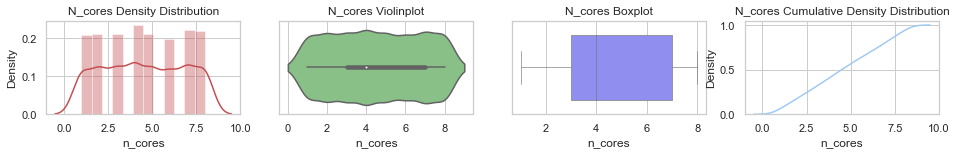

In [ ]:
summary('n_cores')    #tedad haste haye pardazandeye mobile? chand hastehii ast?

In [ ]:
# gushiya minimum 1 hasteii va maximum 8 hasteii hastand.betore miyangin 4 hasteii hastand.
#bazeh [1,8]
# tedade bishtari az gushiya 3 hasteii ta 7 hasteii hastand.

5 Point Summary of Pc Attribute:
Pc(min) : 0
Q1                    : 5.0
Q2(Median)            : 10.0
Q3                    : 15.0
Pc(max) : 20


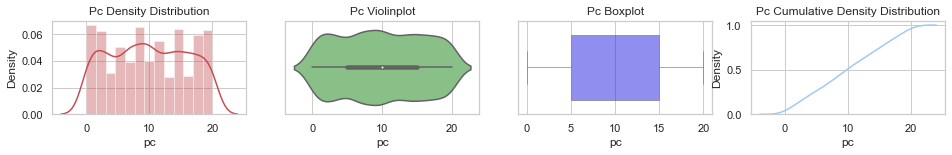

In [ ]:
summary('pc')    #dorbin asli chand pixel?

In [ ]:
#dorbin asli gushi minimum 0(yani gushi dorbin nadard va gushi sade ast) va maximum 20 pixel ast. be tore miyangin dorbine gushiya 10 pixeli budand.
#bazeh [0,20]
# aksare gushiya 5 ta 15 pixeli budand.

5 Point Summary of Px_height Attribute:
Px_height(min) : 0
Q1                    : 282.75
Q2(Median)            : 564.0
Q3                    : 947.25
Px_height(max) : 1960


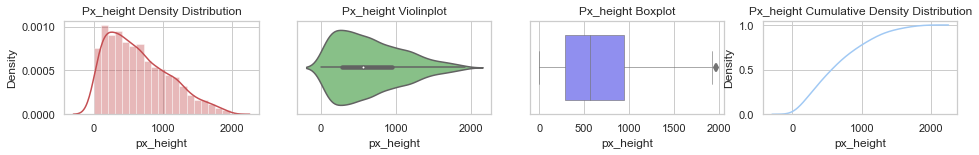

In [ ]:
summary('px_height')    #mizane resolution dar rastaye ertefah      #noise : min nabayad sefr bashad.

In [ ]:
#mizane resolution dar rastaye ertefah minimom 0 va maximum 1960 ast,miyangin resolution ertefah gushiya 546 bude ast.
#bazeh [0,1960]
#resolution dar rastaye ertefahe aksare gushiya beyne 282.75 ta 947.25 bud.

5 Point Summary of Px_width Attribute:
Px_width(min) : 500
Q1                    : 874.75
Q2(Median)            : 1247.0
Q3                    : 1633.0
Px_width(max) : 1998


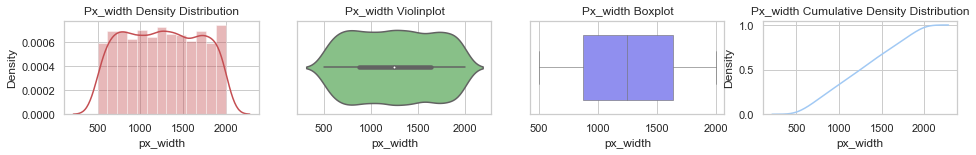

In [ ]:
summary('px_width')    #mizane resolution dar rastaye arz

In [ ]:
#mizane resolution dar rastaye arz minimom 500 va maximum 1998 ast,miyangin resolution arze gushiya 1247 bude ast.
#bazeh [500,1998]
#resolution dar rastaye ertefahe aksare gushiya beyne 874.75 ta 1633 bud.

5 Point Summary of Ram Attribute:
Ram(min) : 256
Q1                    : 1207.5
Q2(Median)            : 2146.5
Q3                    : 3064.5
Ram(max) : 3998


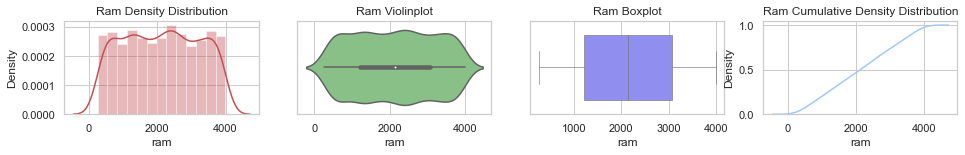

In [ ]:
summary('ram')    #Random Access Memory in Mega Byte

In [ ]:
# ram gushiya minimum 256 va maximum 3998 Mega Byte ast,miyangim 2146 mega byte ram darand.
#bazeh [256,3998]
# aksaran beyne 1207.5 ta 3064.5 mega byte ram darand.

5 Point Summary of Sc_h Attribute:
Sc_h(min) : 5
Q1                    : 9.0
Q2(Median)            : 12.0
Q3                    : 16.0
Sc_h(max) : 19


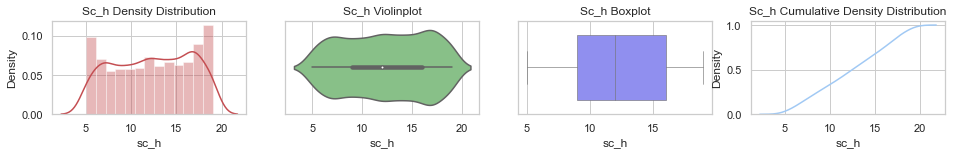

In [ ]:
summary('sc_h')    #ertefae screene mobile (cm)

In [ ]:
# ertefae screene minimum 5 va maximum 19 centimeter ast,miyangim 12 centimeter screen gushiya ertefah darand.
#bazeh [5,19]
# aksaran beyne 9 ta 16 centimeter screen gushiya ertefah darand.

5 Point Summary of Sc_w Attribute:
Sc_w(min) : 0
Q1                    : 2.0
Q2(Median)            : 5.0
Q3                    : 9.0
Sc_w(max) : 18


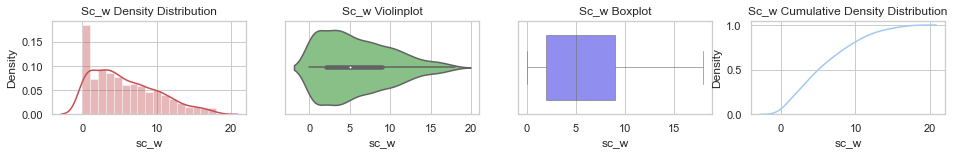

In [ ]:
summary('sc_w')    #arze screene mobile (cm)

In [ ]:
#arze screene mobile minimum 0(arz nadarad = noise) va maximum 18 centimeter ast,miyangim 5 centimeter screen gushiya arz darand.
#bazeh [5,19]
# aksaran beyne 2 ta 9 centimeter screen gushiya arz darand.

5 Point Summary of Talk_time Attribute:
Talk_time(min) : 2
Q1                    : 6.0
Q2(Median)            : 11.0
Q3                    : 16.0
Talk_time(max) : 20


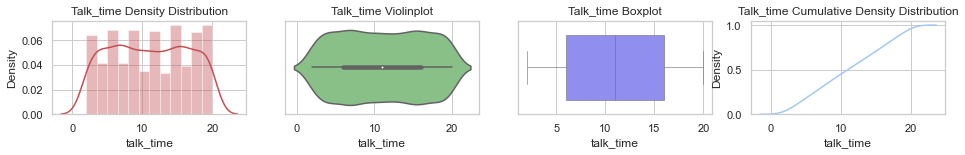

In [ ]:
summary('talk_time')    #bishtarin zamani k ba yebar sharzhe batry mitavan sohbat kard.

In [ ]:
#bishtarin zamani k ba yebar sharzhe batry mitavan sohbat kard minimum 2 daghighe ta 20 daghighe ast.miyangin mitavan 11 daghighe sohbat kard.
#bazeh[2,20]
# aksaran beyne 6 ta 16 daghighe mitavan bad az sharje gushi sohbat kard.

# hazfe Noise

In [ ]:
# hazfe noise aval:
#sc_w: arze screene mobile (cm)      min = 0 nemishe k arze screen 0 bashe!        max = 18        noise!!!!!!
data_train1 = data_train[(data_train["sc_w"]!=0)]
data_train1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# hazfe noise dovom:
#px_height: mizane resolution dar rastaye ertefah         min = 0 nemishe k sefr bashe!!!      max =  1960     noise!!!!!!!
data_train2 = data_train1[(data_train1["px_height"]!=0)]
data_train2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


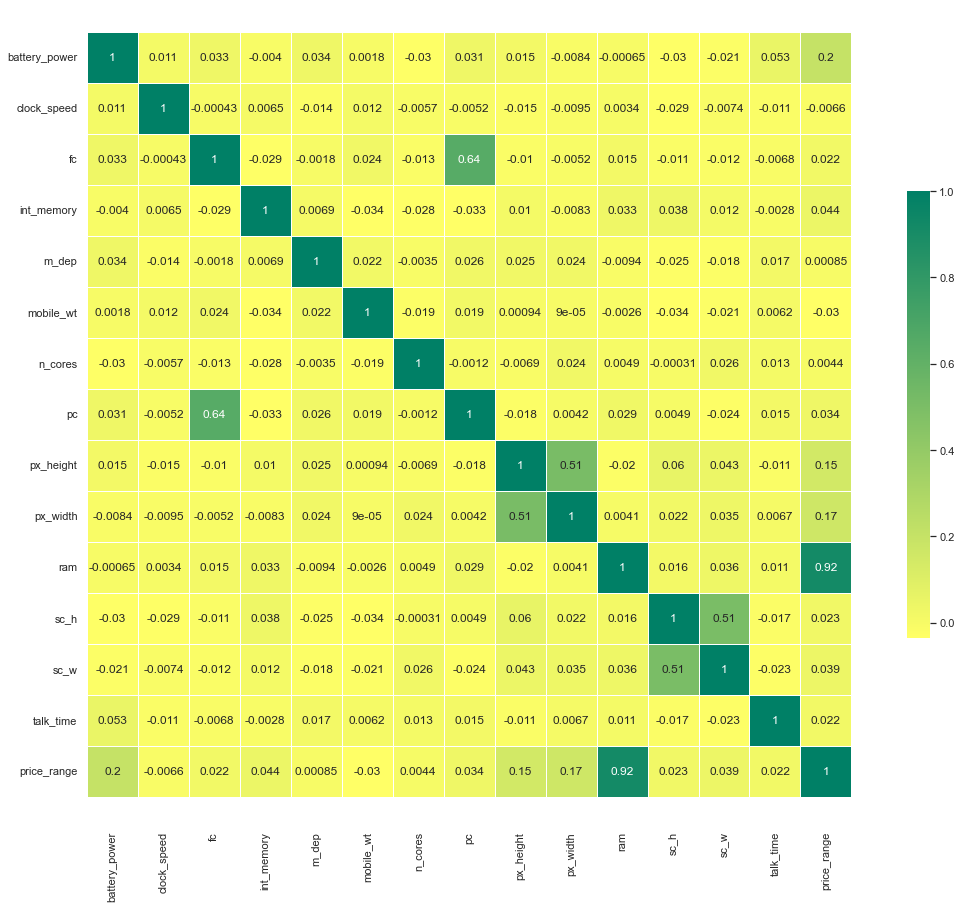

In [ ]:
# barresi correlatin features
corr = data_train.corr()
plt.figure(figsize=(20, 15))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
# moshahede mikonim k price_range(Target) ba ram 92% corrolation darad.
# pc va fc ba ham 64% corrolation darand.
#px_height ba px_width 51% corrolation dard.
#sc_h ba sc_w 51% corrolation dard.
# feature ram mohmtarin feature ast chon bishtrain corrolation ra ba target darad.

In [ ]:
def summary2(x):
    x_min = data_train2[x].min()     # mohasebeye minimum
    x_max = data_train2[x].max()     # mohasebeye maximum
    Q1 = data_train2[x].quantile(0.25)   #25%    (darvaghe haman dataye describe ra mikhahim namayesh dahim.)
    Q2 = data_train2[x].quantile(0.50)   #50%
    Q3 = data_train2[x].quantile(0.75)   #75%
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')

    plt.subplot(441)    # in adade dakhele parantez : size plathara kuchak va bozorg mikonad. bayad 3 raghami bashad.
# harche in adad be satmte kamtar masalan 221 beravad size plot bozorgtar va harche be samte bishtar 551 beravad size plot kuchetar mishavad.
    ax1 = sns.distplot(data_train2[x], color = 'r')   # namayesh plot be surate distplot
    plt.title(f'{x.capitalize()} Density Distribution')   #titre plot: Density Distribution

    plt.subplot(442)
    ax2 = sns.violinplot(x = data_train2[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')

    plt.subplot(443)
    ax2 = sns.boxplot(x=data_train2[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')

    plt.subplot(444)
    ax3 = sns.kdeplot(data_train2[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.show()

5 Point Summary of Sc_w Attribute:
Sc_w(min) : 0
Q1                    : 2.0
Q2(Median)            : 5.0
Q3                    : 9.0
Sc_w(max) : 18


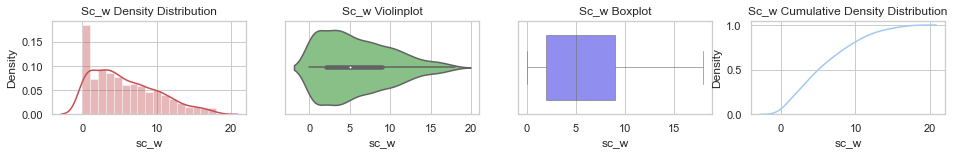

In [ ]:
#plot ghable hazfe noise
summary('sc_w')    #arze screene mobile (cm)

5 Point Summary of Sc_w Attribute:
Sc_w(min) : 1
Q1                    : 3.0
Q2(Median)            : 6.0
Q3                    : 9.0
Sc_w(max) : 18


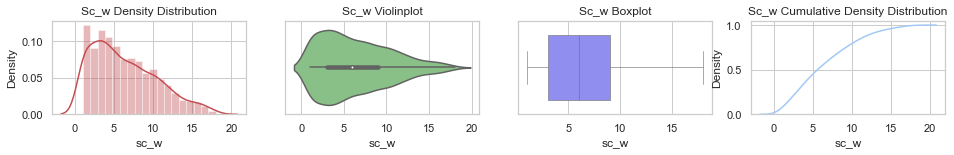

In [ ]:
#plot bad az hazfe noise
summary2('sc_w')    #arze screene mobile (cm)

In [ ]:
#arze screene mobile ghable hazfe noise az 0 ta 18 bud va bad az hazfe noise az 1 ta 18 shode ast.

5 Point Summary of Px_height Attribute:
Px_height(min) : 0
Q1                    : 282.75
Q2(Median)            : 564.0
Q3                    : 947.25
Px_height(max) : 1960


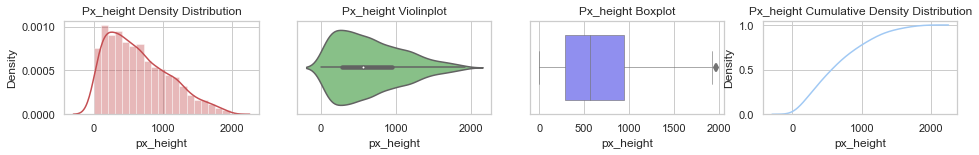

In [ ]:
#plot ghable hazfe noise   px_height
summary('px_height')    #mizane resolution dar rastaye ertefah

5 Point Summary of Px_height Attribute:
Px_height(min) : 1
Q1                    : 284.0
Q2(Median)            : 562.0
Q3                    : 952.0
Px_height(max) : 1960


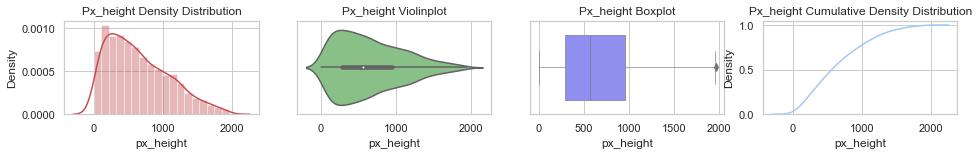

In [ ]:
#plot bad az hazfe noise
summary2('px_height')    #mizane resolution dar rastaye ertefah

In [ ]:
#mizane resolution dar rastaye ertefah ghabl az hazfe nise az 0 ta 1960 bud va bad az hazfe noise az 1 ta 1960 shod.

In [ ]:
# rafe noise resolation tasire nachizi dar natije dasht.

# Univariate Analysis - Categorical Attributes

function baraye rasme barplot va pieplot baraye features categorical:

Categorical Attributes: ['four_g', 'three_g', 'blue', 'wifi', 'dual_sim', 'touch_screen']

In [ ]:
   #price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

In [ ]:
def cat_view(x = 'n_cores'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.YlGnBu(np.linspace(.4, .8, 30))
    color3 = cm.PuRd(np.linspace(.4, .8, 30))
    color4 = cm.viridis(np.linspace(.4, .8, 30))

    fig, ax = plt.subplots(1, 5, figsize=(16, 6))


    """
    Draw a Pie Chart on first subplot.
    """
    s = data_train2.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')

    """
    Draw a Bar Graph on second subplot.
    """

    df1 = pd.pivot_table(data_train2, index = [x], columns = ['price_range'], values = ['ram'], aggfunc = len)
    df2 = pd.pivot_table(data_train2, index = [x], columns = ['price_range'], values = ['ram'], aggfunc = len)
    df3 = pd.pivot_table(data_train2, index = [x], columns = ['price_range'], values = ['ram'], aggfunc = len)
    df4 = pd.pivot_table(data_train2, index = [x], columns = ['price_range'], values = ['ram'], aggfunc = len)

    labels1 = df1.index.tolist()
    low_cost = df1.values[:, 0].tolist()
    low_cost = df1.values[:, 1].tolist()

    labels2 = df2.index.tolist()
    medium_cost = df2.values[:, 0].tolist()
    medium_cost = df2.values[:, 1].tolist()

    labels3 = df3.index.tolist()
    high_cost = df3.values[:, 0].tolist()
    high_cost = df3.values[:, 1].tolist()

    labels4 = df4.index.tolist()
    very_high_cost = df4.values[:, 0].tolist()
    very_high_cost = df4.values[:, 1].tolist()

    l1 = np.arange(len(labels1))  # the label locations
    width = 0.30  # the width of the bars

    l2 = np.arange(len(labels2))  # the label locations
    width = 0.30  # the width of the bars

    l3 = np.arange(len(labels3))  # the label locations
    width = 0.30  # the width of the bars

    l4 = np.arange(len(labels4))  # the label locations
    width = 0.30  # the width of the bars


    rects1 = ax[1].bar(l1 - width/2, low_cost, width, label='low cost', color = color1)
    rects2 = ax[2].bar(l2 + width/2, medium_cost, width, label='medium cost', color = color2)
    rects3 = ax[3].bar(l3 - width/2, high_cost, width, label='high cost', color = color3)
    rects4 = ax[4].bar(l4 + width/2, very_high_cost, width, label='very high cost', color = color4)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph low cost')
    ax[1].set_xticks(l1)
    ax[1].set_xticklabels(labels1)
    ax[1].legend()

    ax[2].set_ylabel('Scores')
    ax[2].set_title(f'{x.capitalize()} Bar Graph medium cost')
    ax[2].set_xticks(l2)
    ax[2].set_xticklabels(labels2)
    ax[2].legend()

    ax[3].set_ylabel('Scores')
    ax[3].set_title(f'{x.capitalize()} Bar Graph high cost')
    ax[3].set_xticks(l3)
    ax[3].set_xticklabels(labels3)
    ax[3].legend()

    ax[4].set_ylabel('Scores')
    ax[4].set_title(f'{x.capitalize()} Bar Graph very high cost')
    ax[4].set_xticks(l4)
    ax[4].set_xticklabels(labels4)
    ax[4].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',
                        ha='center', va='bottom')

            ax[2].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',
                        ha='center', va='bottom')

            ax[3].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',
                        ha='center', va='bottom')

            ax[4].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()
    plt.show()

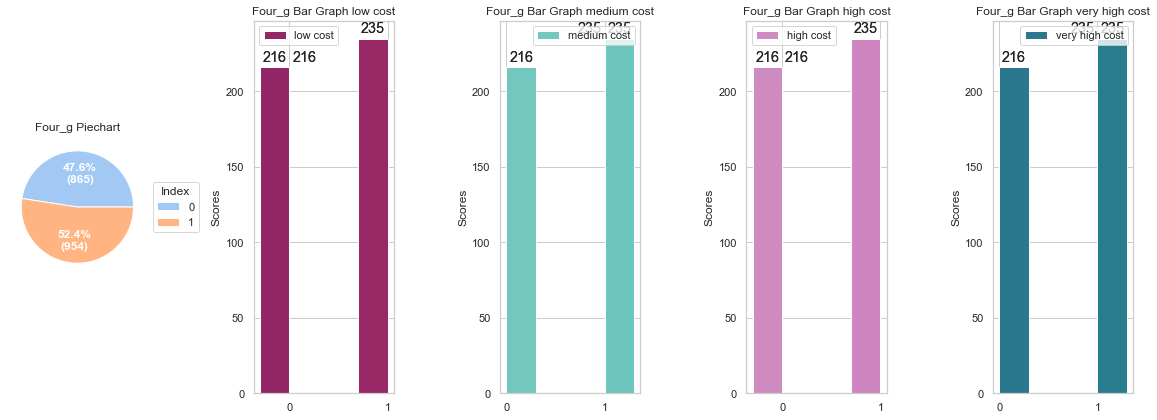

In [ ]:
cat_view('four_g')

In [ ]:
# az 865 (moadele 47.6%) gushi faghede ghabeliyate 4G, 216 gushi "low cost" (arzan), 216 gushi "medium cost" (motevaset), 216 gushi "high cost" (geran), 216 gushi "very high cost" (kheyli geran) ast.
# az 954 (moadele 52.4%) gushi daraye ghabeliyate 4G, 235 gushi "low cost" (arzan), 235 gushi "medium cost" (motevaset), 235 gushi "high cost" (geran), 235 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate 4G va che dar gushihaye faghede ghabeliyate 4G yeksan hastand.
# price_range gushihaye daraye ghabeliyate 4G balatar ast.

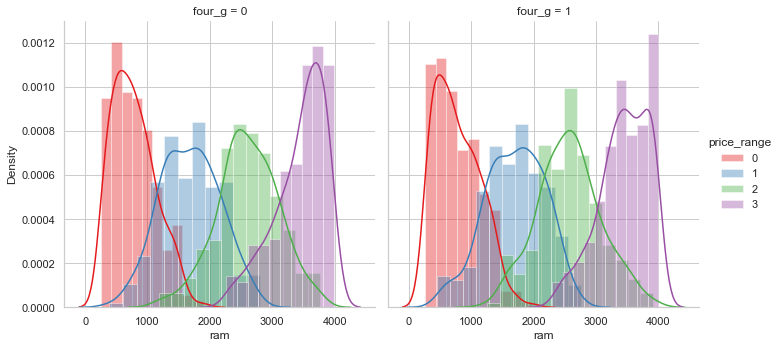

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

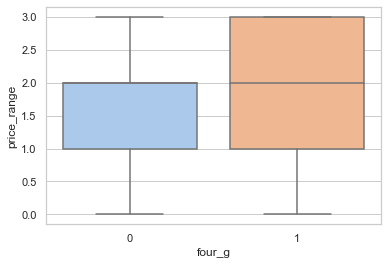

In [ ]:
g = sns.FacetGrid(data_train2, col="four_g", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['four_g'],data_train2['price_range'])


In [ ]:
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate 4G beyne range gheymati class 1 ta 2 yani motevaset va geran hastand.
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate 4G beyne range gheymati class 1 ta 3 yani motevaset va geran va kheyli geran hastand.(price range aksaran geran ast)

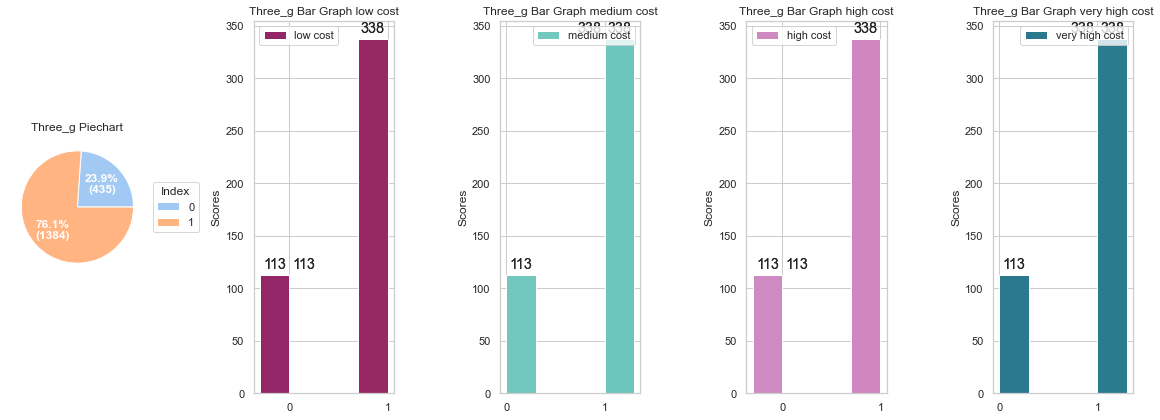

In [ ]:
cat_view('three_g')

In [ ]:
# az 435 (moadele 23.9%) gushi faghede ghabeliyate 3G, 113 gushi "low cost" (arzan), 113 gushi "medium cost" (motevaset), 113 gushi "high cost" (geran), 113 gushi "very high cost" (kheyli geran) ast.
# az 1384 (moadele 76.1%) gushi daraye ghabeliyate 3G, 338 gushi "low cost" (arzan), 338 gushi "medium cost" (motevaset), 338 gushi "high cost" (geran), 338 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate 3G va che dar gushihaye faghede ghabeliyate 3G yeksan hastand.
# price_range gushihaye daraye ghabeliyate 3G balatar ast.

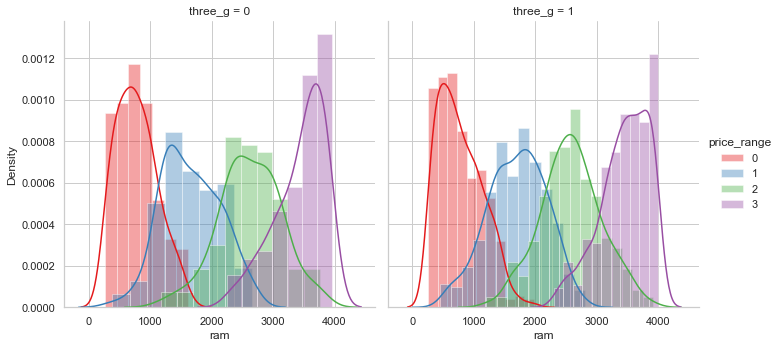

<AxesSubplot:xlabel='three_g', ylabel='price_range'>

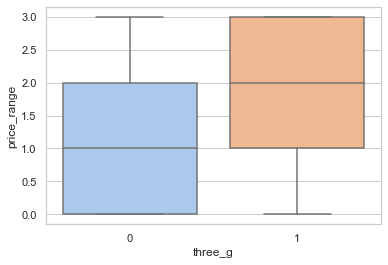

In [ ]:
g = sns.FacetGrid(data_train2, col="three_g", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['three_g'],data_train2['price_range'])

In [ ]:
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate 3G beyne range gheymati class 0 ta 2 yani arzan va motevaset va geran hastand.(price range aksaran motevaset ast)
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate 3G beyne range gheymati class 1 ta 3 yani motevaset va geran va kheyli geran hastand.(price range aksaran geran ast)

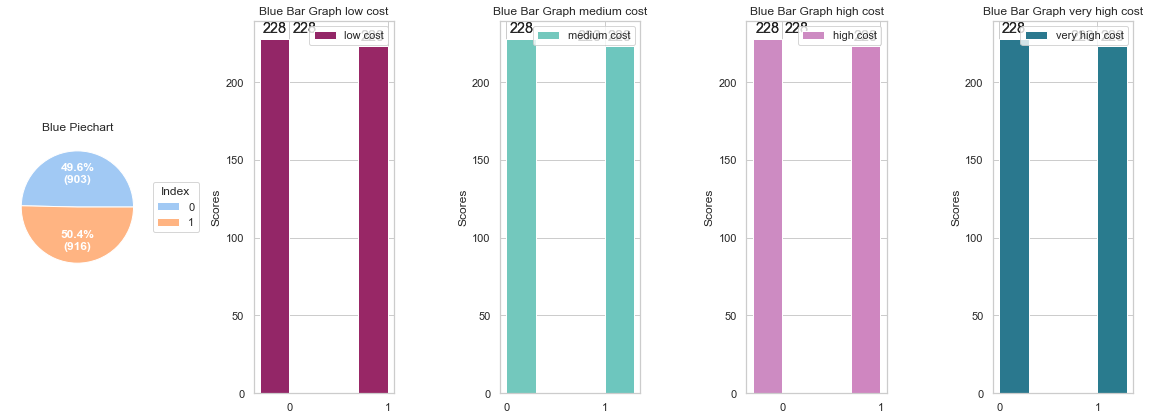

In [ ]:
cat_view('blue')

In [ ]:
# az 903 (moadele 49.6%) gushi faghede ghabeliyate bluetooth, 228 gushi "low cost" (arzan), 228 gushi "medium cost" (motevaset), 228 gushi "high cost" (geran), 228 gushi "very high cost" (kheyli geran) ast.
# az 916 (moadele 50.4%) gushi daraye ghabeliyate bluetooth , 223 gushi "low cost" (arzan), 223 gushi "medium cost" (motevaset), 223 gushi "high cost" (geran), 223 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate bluetooth va che dar gushihaye faghede ghabeliyate bluetooth yeksan hastand.
# price_range gushihaye daraye ghabeliyate bluetooth balatar ast.

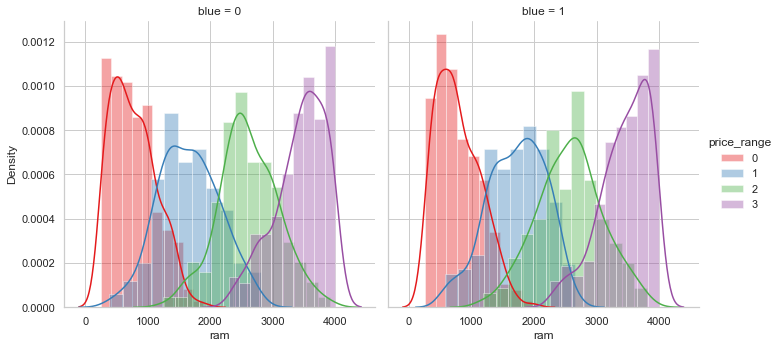

<AxesSubplot:xlabel='blue', ylabel='price_range'>

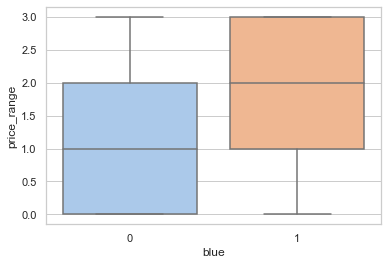

In [ ]:
g = sns.FacetGrid(data_train2, col="blue", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['blue'],data_train2['price_range'])

In [ ]:
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate bluetooth beyne range gheymati class 0 ta 2 yani arzan va motevaset va geran hastand.(price range aksaran motevaset ast)
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate bluetooth beyne range gheymati class 1 ta 3 yani motevaset va geran va kheyli geran hastand.(price range aksaran geran ast)

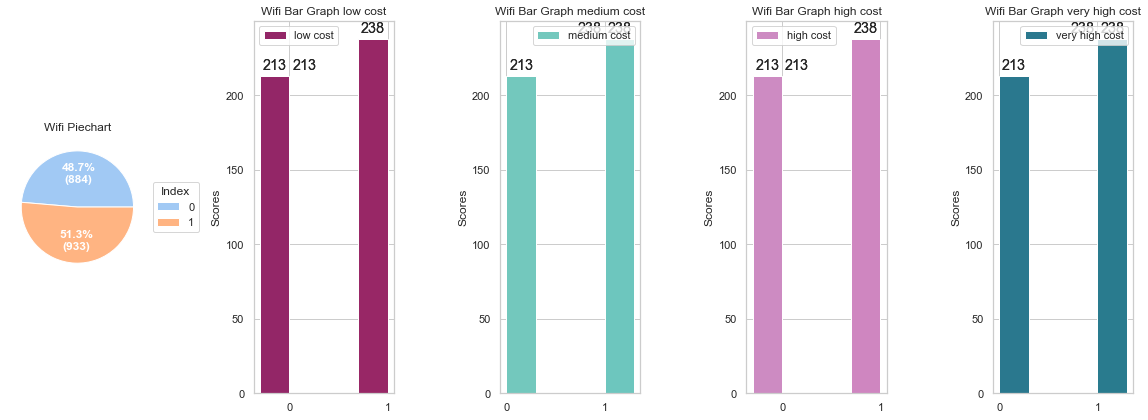

In [ ]:
cat_view('wifi')

In [ ]:
# az 884 (moadele 48.7%) gushi faghede ghabeliyate wifi, 213 gushi "low cost" (arzan), 213 gushi "medium cost" (motevaset), 213 gushi "high cost" (geran), 213 gushi "very high cost" (kheyli geran) ast.
# az 933 (moadele 51.3%) gushi daraye ghabeliyate wifi , 238 gushi "low cost" (arzan), 238 gushi "medium cost" (motevaset), 238 gushi "high cost" (geran), 238 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate wifi va che dar gushihaye faghede ghabeliyate wifi yeksan hastand.
# price_range gushihaye daraye ghabeliyate wifi balatar ast.

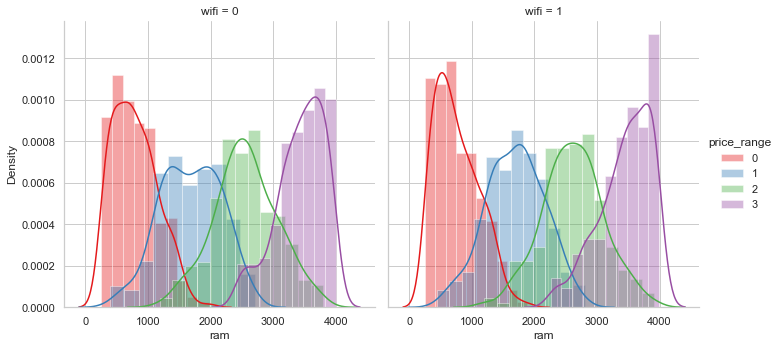

<AxesSubplot:xlabel='wifi', ylabel='price_range'>

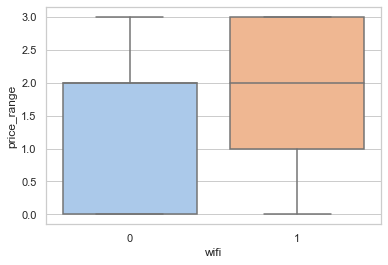

In [ ]:
g = sns.FacetGrid(data_train2, col="wifi", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['wifi'],data_train2['price_range'])

In [ ]:
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate wifi beyne range gheymati class 0 ta 2 yani arzan va motevaset va geran hastand.
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate wifi beyne range gheymati class 1 ta 3 yani motevaset va geran va kheyli geran hastand.(price range aksaran geran ast)

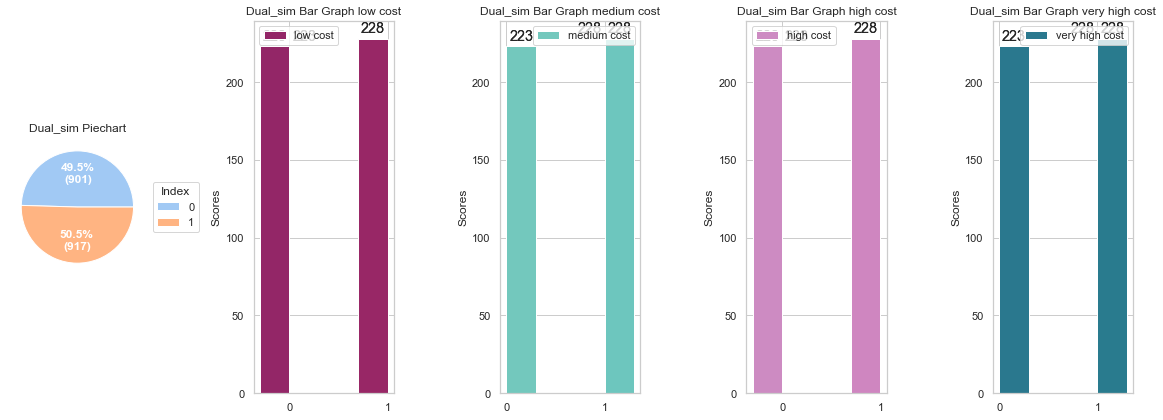

In [ ]:
cat_view('dual_sim')

In [ ]:
# az 901 (moadele 49.5%) gushi faghede ghabeliyate dual_sim, 223 gushi "low cost" (arzan), 223 gushi "medium cost" (motevaset), 223 gushi "high cost" (geran), 223 gushi "very high cost" (kheyli geran) ast.
# az 917 (moadele 50.5%) gushi daraye ghabeliyate dual_sim , 228 gushi "low cost" (arzan), 228 gushi "medium cost" (motevaset), 228 gushi "high cost" (geran), 228 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate dual_sim va che dar gushihaye faghede ghabeliyate dual_sim yeksan hastand.
# price_range gushihaye daraye ghabeliyate dual_sim balatar ast.

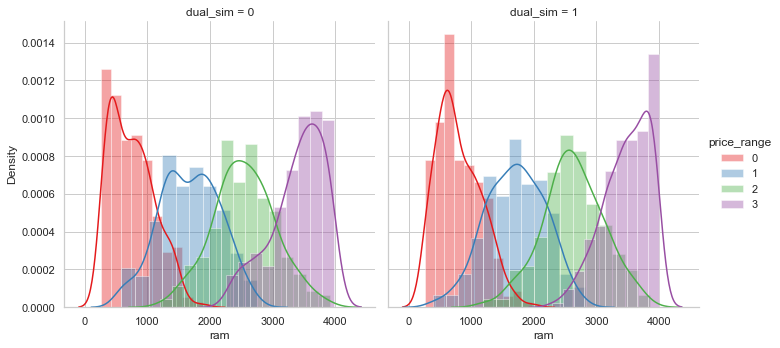

<AxesSubplot:xlabel='dual_sim', ylabel='price_range'>

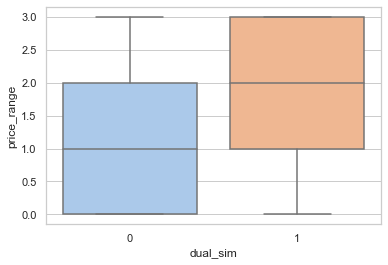

In [ ]:
g = sns.FacetGrid(data_train2, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['dual_sim'],data_train2['price_range'])

In [ ]:
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate dual_sim beyne range gheymati class 0 ta 2 yani arzan va motevaset va geran hastand.(price range aksaran motevaset ast)
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate dual_sim beyne range gheymati class 1 ta 3 yani motevaset va geran va kheyli geran hastand.(price range aksaran geran ast)

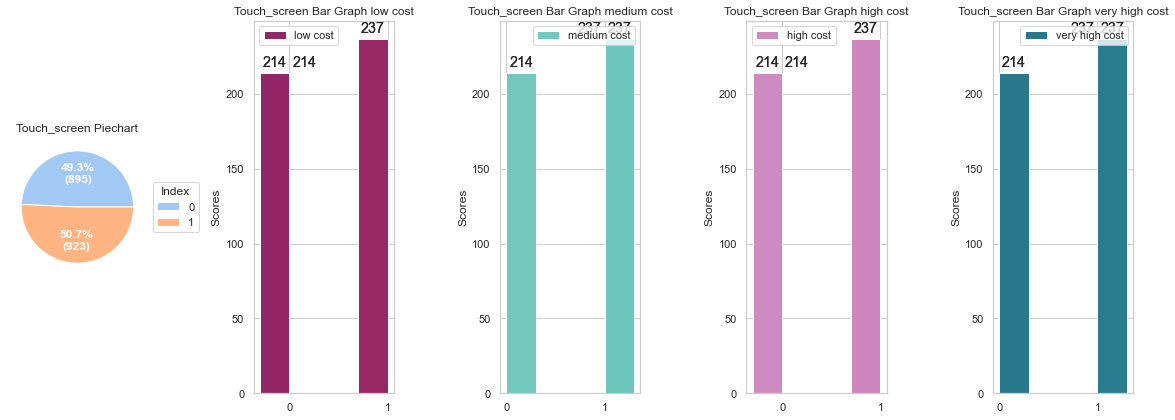

In [ ]:
cat_view('touch_screen')

In [ ]:
# az 895 (moadele 49.3%) gushi faghede ghabeliyate touch_screen, 214 gushi "low cost" (arzan), 214 gushi "medium cost" (motevaset), 214 gushi "high cost" (geran), 214 gushi "very high cost" (kheyli geran) ast.
# az 923 (moadele 50.7%) gushi daraye ghabeliyate touch_screen , 237 gushi "low cost" (arzan), 237 gushi "medium cost" (motevaset), 237 gushi "high cost" (geran), 237 gushi "very high cost" (kheyli geran) ast.
# result : darsad va tedad dar har 4 class price_range che dar gushihaye daraye ghabeliyate touch_screen va che dar gushihaye faghede ghabeliyate touch_screen yeksan hastand.
# price_range gushihaye daraye ghabeliyate touch_screen balatar ast.

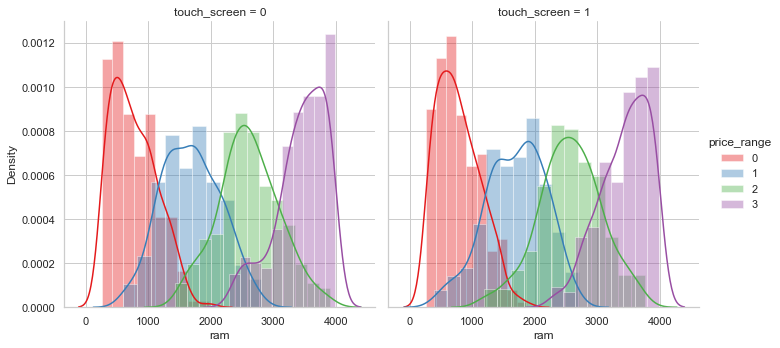

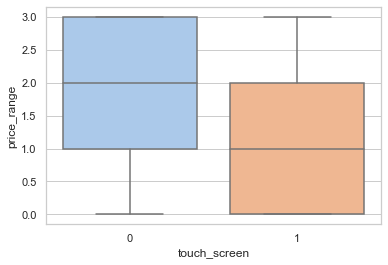

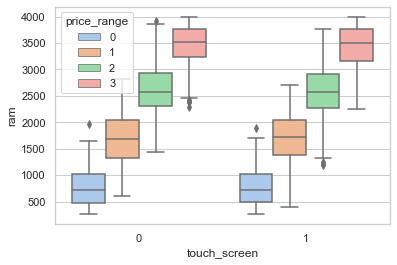

In [ ]:
g = sns.FacetGrid(data_train2, col="touch_screen", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())
plt.show()


sns.boxplot(data_train2['touch_screen'],data_train2['price_range'])
plt.show()


sns.boxplot(x='touch_screen', y='ram', hue='price_range', data=data_train2)
plt.show()

In [ ]:
# touch_screen va price_range :
# hamantor k dar box plot moshahede mishavad gushihaye faghede ghabeliyate touch_screen beyne range gheymati class 1 ta 3 yani motevaset va geran kheyli geran hastand.(price range aksaran geran ast)
# hamantor k dar box plot moshahede mishavad gushihaye daraye ghabeliyate touch_screen beyne range gheymati class 0 ta 2 yani arzan va motevaset va geran hastand.(price range aksaran motevaset ast)
#touch_screen va ram :
# price_range gushi faghede ghabeliyate touch_screen, agar "ram" beyne 500 ta 1100 Mega Byte bashad "arzan", agar "ram" beyne 1300 ta 2100 Mega Byte bashad "motevaset", agar "ram" beyne 2300 ta 2900 Mega Byte bashad "geran", agar "ram" beyne 3300 ta 3800 Mega Byte bashad "kheyli geran" ast.
# price_range gushi daraye ghabeliyate touch_screen, agar "ram" beyne 500 ta 1100 Mega Byte bashad "arzan", agar "ram" beyne 1400 ta 2100 Mega Byte bashad "motevaset", agar "ram" beyne 2200 ta 2850 Mega Byte bashad "geran", agar "ram" beyne 3200 ta 3800 Mega Byte bashad "kheyli geran" ast.
# result : harche fazaye ram bishtar, gheymate gushi ham balatar miravad.

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

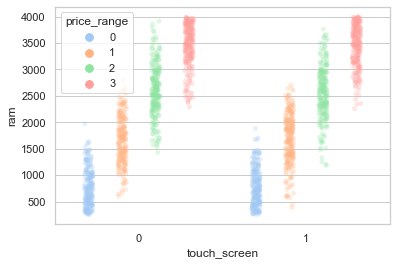

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data_train2, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

In [ ]:
##touch_screen va ram :
# price_range gushi faghede ghabeliyate touch_screen, agar "ram" beyne 100 ta 1500 Mega Byte bashad "arzan", agar "ram" beyne 600 ta 2500 Mega Byte bashad "motevaset", agar "ram" beyne 1500 ta 4000 Mega Byte bashad "geran", agar "ram" beyne 2300 ta 4000 Mega Byte bashad "kheyli geran" ast.
# price_range gushi daraye ghabeliyate touch_screen, agar "ram" beyne 100 ta 1500 Mega Byte bashad "arzan", agar "ram" beyne 400 ta 2600 Mega Byte bashad "motevaset", agar "ram" beyne 1100 ta 3600 Mega Byte bashad "geran", agar "ram" beyne 2200 ta 4000 Mega Byte bashad "kheyli geran" ast.
# result : dashtan ya nadashtane touch_screen tasire ziyadi ruye ram nadard.

Text(0.5, 0, 'MegaPixels')

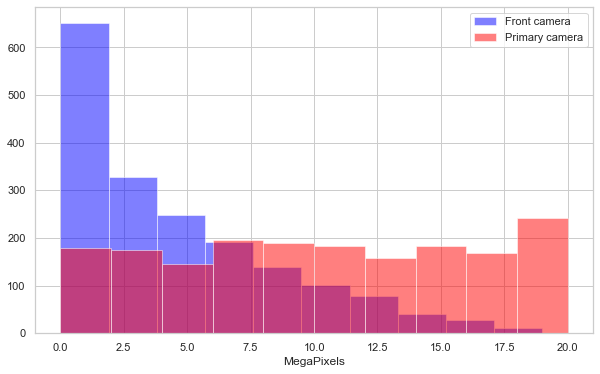

In [ ]:
plt.figure(figsize=(10,6))
data_train2['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data_train2['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [ ]:
# # pc va fc ba ham corrolation darand.
# pc 0 ta 20 megapixele
# fc 0 ta 19 mega pixele

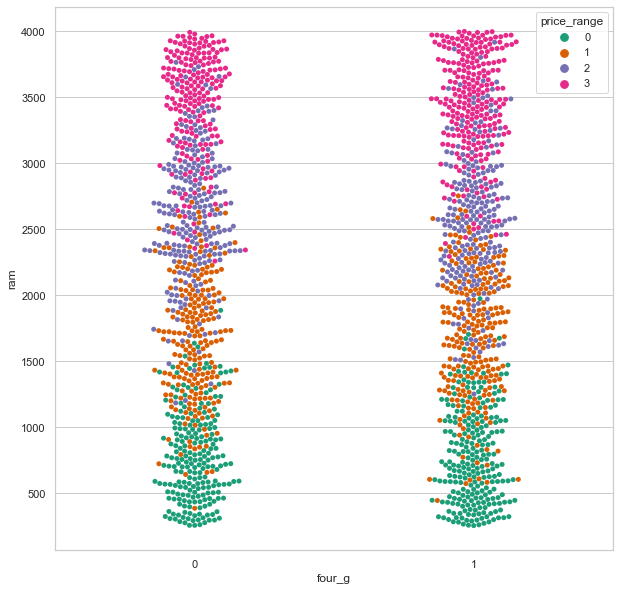

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=data_train2)
ax=sns.set(style="darkgrid")

In [ ]:
# price_range gushi faghede ghabeliyate 4G, agar "ram" beyne 200 ta 1000 Mega Byte bashad "arzan", agar "ram" beyne 100 ta 2000 Mega Byte bashad "motevaset", agar "ram" beyne 2000 ta 3000 Mega Byte bashad "geran", agar "ram" beyne 3000 ta 4000 Mega Byte bashad "kheyli geran" ast.
#price_range daraye daraye ghabeliyate 4G, agar "ram" beyne 200 ta 1000 Mega Byte bashad "arzan", agar "ram" beyne 100 ta 2000 Mega Byte bashad "motevaset", agar "ram" beyne 2000 ta 3000 Mega Byte bashad "geran", agar "ram" beyne 3000 ta 4000 Mega Byte bashad "kheyli geran" ast.
# result : 4G budan ya nabudan gushi ruye ram tasiri nadarad. vali gushi daraye ghabeliyate 4G nesbate be gushi faghede ghabeliyate 4G gheymate balatari darad.

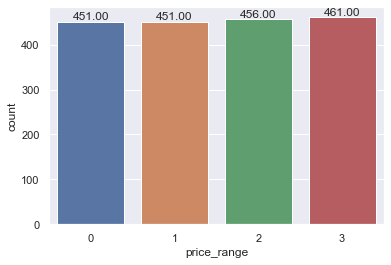

In [ ]:
splot = sns.countplot(x = 'price_range', data = data_train2)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [ ]:
# 451 gushi dar mahdudeye range gheymati "arzan", 451 gushi dar mahdudeye range gheymati "motevaset", 456 gushi dar mahdudeye range gheymati "geran", 461 gushi dar mahdudeye range gheymati "kheyli geran" hastand.

In [ ]:
#Categorical Attributes: ['four_g', 'three_g', 'blue', 'wifi', 'dual_sim', 'touch_screen']

In [ ]:
print(data_train2['four_g'].value_counts())

1    954
0    865
Name: four_g, dtype: int64


In [ ]:
# 954 gushi daraye ghabeliyate 4G va 865 gushi faghede ghabeliyate 4G ast.
# tedade daraye 4G bishtar ast.

In [ ]:
print(data_train2['three_g'].value_counts())

1    1384
0     435
Name: three_g, dtype: int64


In [ ]:
# 1384 gushi daraye ghabeliyate 3G va 435 gushi faghede ghabeliyate 3G ast.
# tedade daraye 3G bishtar ast.

In [ ]:
print(data_train2['blue'].value_counts())

1    916
0    903
Name: blue, dtype: int64


In [ ]:
# 916 gushi daraye ghabeliyate blue va 903 gushi faghede ghabeliyate blue ast.
# tedade daraye blue bishtar ast.

In [ ]:
print(data_train2['wifi'].value_counts())

1    934
0    885
Name: wifi, dtype: int64


In [ ]:
# 934 gushi daraye ghabeliyate wifi va 885 gushi faghede ghabeliyate wifi ast.
# tedade daraye wifi bishtar ast.

In [ ]:
print(data_train2['dual_sim'].value_counts())

1    918
0    901
Name: dual_sim, dtype: int64


In [ ]:
# 918 gushi daraye ghabeliyate dual_sim va 901 gushi faghede ghabeliyate dual_sim ast.
# tedade daraye dual_sim bishtar ast.

In [ ]:
print(data_train2['touch_screen'].value_counts())

1    923
0    896
Name: touch_screen, dtype: int64


In [ ]:
# 923 gushi daraye ghabeliyate touch_screen va 896 gushi faghede ghabeliyate touch_screen ast.
# tedade daraye touch_screen bishtar ast.

In [ ]:
data_train2.isnull().sum()   # barresi mojadad missing value featurs ghabl az modelsazi

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# data_train2 missing value nadarad.
# moshahede mishavad k mising value hata bad az hazf noise ndrim.

In [ ]:
#Multivariate Analysis

In [ ]:
#jodasazi feature va target dar 2 motegghayere X va Y
X = data_train2.drop('price_range', axis = 1)        # Features
Y = data_train2[['price_range']]                     # Target

In [ ]:
print("shape of x is:",X.shape)      # Namayeshe tedade satr va sotune features
print("shape of y is:",Y.shape)      # Namayeshe tedade satr va sotune Target

shape of x is: (1819, 20)
shape of y is: (1819, 1)


In [ ]:
# barresi featuters ba ahamiyate bishtar

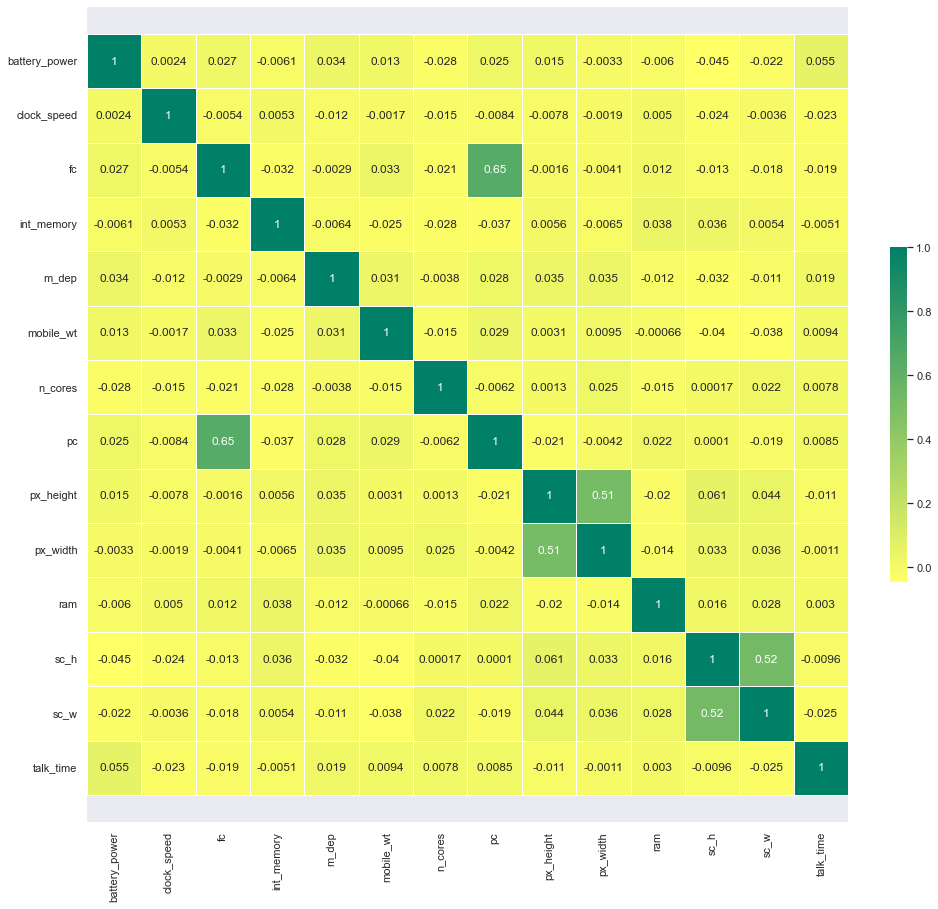

In [ ]:
# barresi correlatin features
corr = X.corr()
plt.figure(figsize=(15, 15))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
# hamantor k ghablan tozih dadim feature "ram" az ahamiyate bishtari nesbate be baghye features barkhordar bud.

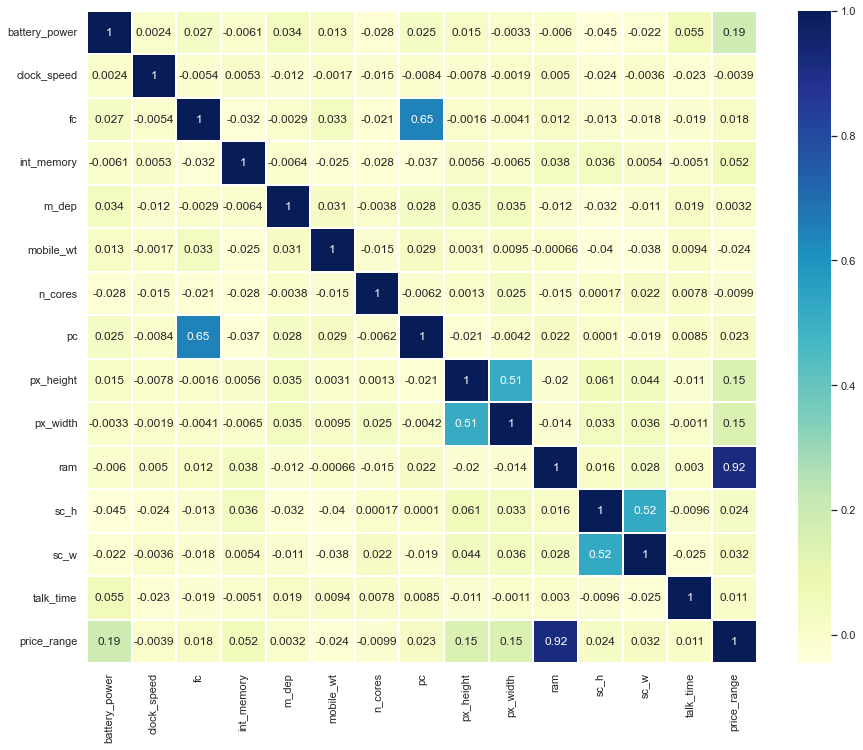

In [ ]:
# barresi correlatin Features & Target
plt.figure(figsize=(15, 12))
sns.heatmap(data_train2.corr(), cmap="YlGnBu",  linewidths=.2,annot = True)
plt.show()

In [ ]:
# modelsazi

In [ ]:
# ebteda yek majmuehye train va test az data dorost mikonim. 20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [ ]:
#Feature Selection :
#barresi kardim k kodam features ahamiyate bishtari darand.

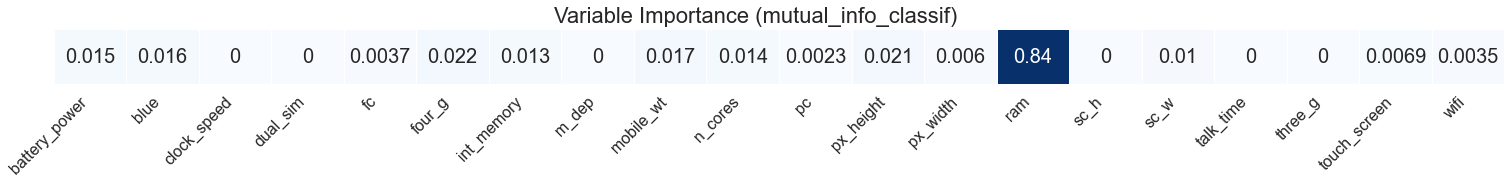

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

In [ ]:
# mutual_info_classif : takhmin etelaate moteghabel baraye target
# Mutual information (MI) : vabastegi beyne moteghayer ha ra andazehgiri mikonad.
# dar vaghe moshakhas kardim k kodam vizhegiha tasire bishtari bar target darand va mohemtarand.
# feature ram daraye ahamiyate bishtar, va tasire bishtari bar target darad.

Text(0.5, 0, 'Relative Importance')

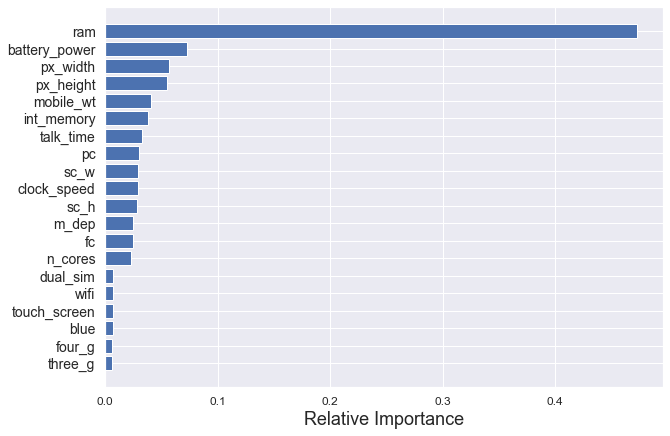

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)      #fit(X_train, y_train) model

features = list(X_train.columns)
importances = rf_clf.feature_importances_     #ahamiyate featur ha ra bar asase miyangin va enheraf meyar dar har derakht mohasebe mikonad.
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [ ]:
# inja ham baz feature ram daraye ahamiyate bishtar, va tasire bishtari bar target darad.

In [ ]:
# normalsazi va encoding features categorical va ijad soyunhaye vahed az edghame feature numrical va categorical be surat araye

In [ ]:
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler     #ketabkhane normalsazi
from sklearn.preprocessing import OneHotEncoder      # ramzgozari features categirical be surate araye adadi
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')        # sotunhaye adadi(number) ra barmigardanad
X_train_cat = X_train.select_dtypes(include='category')      # sotunhaye category ra barmigardanad

num_attribs = list(X_train_num.columns)            # list dorast karde az features numerical
cat_attribs = list(X_train_cat.columns)            # list dorast karde az features catecorical

transformer = ColumnTransformer([                  #ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame
        ("num", StandardScaler(), num_attribs),    # features numerical normalize
        ("cat", OneHotEncoder(), cat_attribs),     #faetures catecorical encode
    ])

X_train = transformer.fit_transform(X_train)      #X_train r fit karde
print(X_train.shape)
X_train[1, :]

(1455, 26)


array([-0.07225566,  0.61055467, -0.75925372, -0.5022764 , -1.38385274,
       -1.65488003, -0.24175138, -0.13654812, -1.08351143, -0.33280012,
       -1.06474618,  0.13193745,  0.64602105,  1.1038757 ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ])

#from sklearn.preprocessing import OneHotEncoder:

encoding features categirical be surate araye adadi ba, yek sotune binary baraye har daste ijad va yek matrix parakande ya

rayeh moterakem bar migardanad.

#from sklearn.compose import ColumnTransformer:

Applies transformers to columns of an array or pandas DataFrame.

baraye ijad fazaye vizhegi vahed bekar miravad. baraye datasethaiin k daraye features nahamgen( yani dataset ham faeture

numerical dashte bashe va ham feature categorical)

ColumnTransformer: features numerical ra scale(meghyasbandi) va features categorical ra yekseri encode(code gozari) mikonad.

DataFrame.select_dtypes(include=None, exclude=None)

include = dadehaii k mikhym bashnd, masalan include=numerical, لیستی از نام ستون های عددی یک مجموعه داده را برمی گرداند

exclude= dadehaii k mikhym nabashand

In [ ]:
#4.Training Models

In [ ]:
#jodasazi feature va target dar 2 motegghayere X va Y va tabdil X va Y be arayeh
X = data_train2.drop('price_range', axis = 1)
Y = data_train2[['price_range']].values.reshape(-1,1)

In [ ]:
#Split x and y into training and testing sets, 20% az dataframe ra baraye test va 80% baraye train bezar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [ ]:
############# SVM #############

# svm kernel rbf

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train,y_train)
y_train_pred = svc_rbf.predict(X_train)
y_test_pred = svc_rbf.predict(X_test)

svc_rbf_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred, y_test)))

Train Set Accuracy:95.60137457044674
Test Set Accuracy:94.5054945054945

Confusion Matrix:
[[88  3  0  0]
 [ 2 87  4  0]
 [ 0  0 81  5]
 [ 0  0  6 88]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.97      0.94      0.95        93
           2       0.89      0.94      0.92        86
           3       0.95      0.94      0.94        94

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.94       364
weighted avg       0.95      0.95      0.95       364

MAE:  0.054945054945054944
MSE:  0.054945054945054944
R2 Score:  0.9566157935197821


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.98, recall=0.97, f1-score=0.97, support=91ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.97, recall=0.94, f1-score=0.95, support=93ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0.89, recall=0.94, f1-score=0.92, support=86ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.95, recall=0.94, f1-score=0.94, support=94ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 94>93>91>86

#accuracy price_range kheyli geran > motevaset > arzan > geran, 94>93>91>86

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.95%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba # svm kernel rbf daraye accuracy 95% ast.

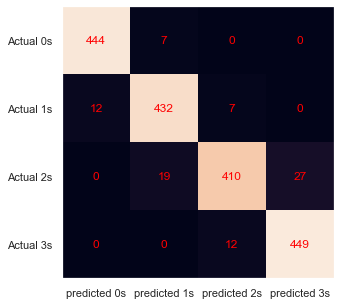

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, svc_rbf.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

444ta data k vaghean 0 bud model ham gofte 0, darvaghe 444 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

432ta data k vaghean 1 bud model ham gofte vaghean 1, 432 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

410ta data k vaghean 2 bud model ham gofte vaghean 2, 410 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

449ta data k vaghean 3 bud model ham gofte vaghean 3, 449 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

7ta data k vaghean 0 bud model gofte 1 , 7 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

12ta data k vaghean 1 bud model gofte 0 , 12 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


7ta data k vaghean 1 bud model gofte 2 , 7 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

19ta data k vaghean 2 bud model gofte 1 , 19 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


27ta data k vaghean 2 bud model gofte 3 , 27 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

12ta data k vaghean 3 bud model gofte 2 , 12 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.


# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 444+432+410+449=1735 tashkhis dorost va 12+7+7+19+12+27=84 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
svc.intercept_       #arz az mabda, (w0)

array([-0.63402055, -0.02028862,  0.06771834, -0.06727191,  0.03005719,
        0.38462696])

In [ ]:
# svm kernel linear
svc_linear = SVC(kernel = 'linear', random_state = 0)
svc_linear.fit(X_train,y_train)
y_train_pred = svc_linear.predict(X_train)
y_test_pred = svc_linear.predict(X_test)

svc_linear_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred, y_test)))

Train Set Accuracy:99.72508591065292
Test Set Accuracy:95.32967032967034

Confusion Matrix:
[[88  3  0  0]
 [ 2 85  4  0]
 [ 0  2 86  5]
 [ 0  0  1 88]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.93      0.94        91
           2       0.95      0.92      0.93        93
           3       0.95      0.99      0.97        89

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364

MAE:  0.046703296703296704
MSE:  0.046703296703296704
R2 Score:  0.9623050682261208


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.98, recall=0.97, f1-score=0.97, support=91ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.94, recall=0.93, f1-score=0.94, support=91ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0.95, recall=0.92, f1-score=0.93, support=93ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.95, recall=0.99, f1-score=0.97, support=89ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 94>93>91>86

#accuracy price_range geran > motevaset = arzan > kheyli geran, 93>91=91>89

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.95%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba # svm kernel linear daraye accuracy 95% ast.

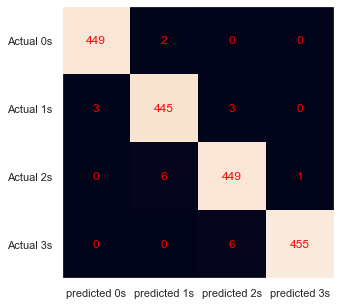

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, svc_linear.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

449ta data k vaghean 0 bud model ham gofte 0, darvaghe 449 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

445ta data k vaghean 1 bud model ham gofte vaghean 1, 445 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

449ta data k vaghean 2 bud model ham gofte vaghean 2, 449 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

455ta data k vaghean 3 bud model ham gofte vaghean 3, 455 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

2ta data k vaghean 0 bud model ham gofte 1 , 2 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

3ta data k vaghean 1 bud model gofte 0 , 3 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


3ta data k vaghean 1 bud model ham gofte 2 , 3 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

6ta data k vaghean 2 bud model ham gofte 1 , 6 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


1ta data k vaghean 2 bud model ham gofte 3 , 1 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

6ta data k vaghean 3 bud model ham gofte 2 , 6 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 449+445+449+455=1798 tashkhis dorost va 2+3+3+6+1+6=21 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
svc_linear.intercept_       #arz az mabda, (w0)

array([499.66273427,   7.36192833,   4.10124862, 210.18722345,
        10.31434238, 316.24162041])

In [ ]:
svc_linear.coef_       #maghadire coef k haman zarayebe x mishavand (w1,w2,...,w11)

array([[-1.33449722e-01, -5.10290627e-02, -6.05909528e-02,
         5.33902655e-02,  4.46864889e-02,  1.05361535e-02,
        -4.92507970e-02, -2.58721267e-02,  3.52295427e-01,
        -2.72336792e-01, -1.83360139e-01, -7.87874113e-02,
        -6.69071095e-02, -2.09496693e-01, -4.39299028e-02,
         3.25063971e-01,  5.01380641e-02,  2.19451868e-03,
        -1.70394153e-02,  1.33463004e-01],
       [-1.46560206e-03, -1.47833115e-06, -7.93402512e-07,
        -1.47833115e-06, -2.86100487e-05, -1.43973616e-07,
        -2.54982920e-05,  6.14848939e-07,  3.65174520e-04,
        -4.43895973e-07, -2.15970088e-05, -8.81157600e-04,
        -8.61940454e-04, -2.40465921e-03,  1.93772172e-05,
         1.06090821e-05,  2.46712535e-05,  1.69406589e-21,
         2.43947735e-07,  4.69467174e-06],
       [-6.99358819e-04,  7.56629727e-08,  5.55315780e-07,
        -8.12997621e-07,  1.03425635e-06,  7.56629727e-08,
        -1.78073363e-05,  3.15429818e-07,  8.83198857e-05,
        -8.51156306e-07,  1.0

In [ ]:
# svm kernel poly
svc_poly = SVC(kernel = 'poly', random_state = 0, degree=8)
svc_poly.fit(X_train,y_train)
y_train_pred = svc_poly.predict(X_train)
y_test_pred = svc_poly.predict(X_test)

svc_poly_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred, y_test)))

Train Set Accuracy:95.4639175257732
Test Set Accuracy:94.5054945054945

Confusion Matrix:
[[90 11  0  0]
 [ 0 79  2  0]
 [ 0  0 87  5]
 [ 0  0  2 88]]

ClassificationReport:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       101
           1       0.88      0.98      0.92        81
           2       0.96      0.95      0.95        92
           3       0.95      0.98      0.96        90

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.94       364
weighted avg       0.95      0.95      0.95       364

MAE:  0.054945054945054944
MSE:  0.054945054945054944
R2 Score:  0.9576869649115669


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=1, recall=0.89, f1-score=0.94, support=101ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.88, recall=0.98, f1-score=0.92, support=81ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0.96, recall=0.95, f1-score=0.95, support=92ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.95, recall=0.98, f1-score=0.96, support=90ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 94>93>91>86

#accuracy price_range arzan > geran > kheyli geran>motevaset , 101>92>90>81

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.95%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba svm kernel poly daraye accuracy 95% ast.

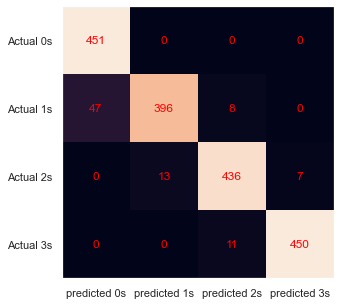

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, svc_poly.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

451ta data k vaghean 0 bud model ham gofte 0, darvaghe 451 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

396ta data k vaghean 1 bud model ham gofte vaghean 1, 396 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

436ta data k vaghean 2 bud model ham gofte vaghean 2, 436 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

450ta data k vaghean 3 bud model ham gofte vaghean 3, 450 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

0ta data k vaghean 0 bud model ham gofte 1 , 0 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

47ta data k vaghean 1 bud model gofte 0 , 47 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


8ta data k vaghean 1 bud model ham gofte 2 , 8 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

13ta data k vaghean 2 bud model ham gofte 1 , 13 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


7ta data k vaghean 2 bud model ham gofte 3 , 7 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

11ta data k vaghean 3 bud model ham gofte 2 , 11 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 451+396+436+450=1733 tashkhis dorost va 0+47+8+13+7+11=86 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
svc_poly.intercept_       #arz az mabda, (w0)

array([1.3152205 , 1.20719708, 1.04304965, 4.27200438, 1.55226442,
       7.63354018])

In [ ]:
# svm kernel sigmoid
svc_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)
svc_sigmoid.fit(X_train,y_train)
y_train_pred = svc_sigmoid.predict(X_train)
y_test_pred = svc_sigmoid.predict(X_test)

svc_sigmoid_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred, y_test)))

Train Set Accuracy:18.694158075601376
Test Set Accuracy:18.681318681318682

Confusion Matrix:
[[51  4  1 13]
 [ 0 12 19 75]
 [ 0  0  0  0]
 [39 74 71  5]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.57      0.74      0.64        69
           1       0.13      0.11      0.12       106
           2       0.00      0.00      0.00         0
           3       0.05      0.03      0.04       189

    accuracy                           0.19       364
   macro avg       0.19      0.22      0.20       364
weighted avg       0.17      0.19      0.18       364

MAE:  1.510989010989011
MSE:  3.1923076923076925
R2 Score:  -1.0650818527578005


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.57, recall=0.74, f1-score=0.64, support=69ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.13, recall=0.11, f1-score=0.12, support=106ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0, recall=0, f1-score=0, support=0ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.05, recall=0.03, f1-score=0.04, support=189ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 94>93>91>86

#accuracy price_range kheyli geran > motevaset > arzan >  geran , 189>106>69>0

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.19%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba svm kernel sigmoid daraye accuracy 19% ast.

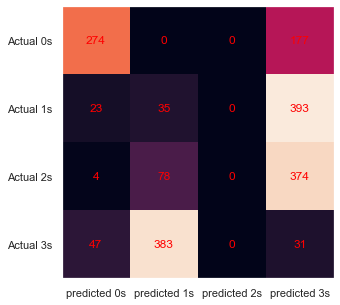

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, svc_sigmoid.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

274ta data k vaghean 0 bud model ham gofte 0, darvaghe 274 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

35ta data k vaghean 1 bud model ham gofte vaghean 1, 35 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

31ta data k vaghean 3 bud model ham gofte vaghean 3, 31 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

23ta data k vaghean 1 bud model gofte 0 , 23 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.

4ta data k vaghean 2 bud model ham gofte 0 , 4 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.

47ta data k vaghean 3 bud model ham gofte 0 , 47 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.

78ta data k vaghean 2 bud model ham gofte 1 , 78 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

383ta data k vaghean 3 bud model gofte 1 , 383 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

374ta data k vaghean 2 bud model ham gofte 3 , 374 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

177ta data k vaghean 0 bud model ham gofte 3 , 177 gushi k price range "arzun" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

393ta data k vaghean 1 bud model ham gofte 3 , 393 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.


# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 274+35+31=340 tashkhis dorost va 23+4+47+78+383+374+177+393=1479 tashkhise eshtebah

result : tedade tashkhishaye eshtebahe model kheyli bishtar az tedade tashkhishaye dorost model ast pas modele khub nist.
    
# kernele sigmoid aslan ruye in dataset khub nist.

In [ ]:
svc_sigmoid.intercept_       #arz az mabda, (w0)

array([14.21649604, 23.13007225, 46.96092735, 28.85562515, 50.73960206,
       22.86006379])

In [ ]:
# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50,max_depth=3)    # ba method
rf = rf.fit(X_train, y_train)
y_train_pred1 = rf.predict(X_train)
y_test_pred1 = rf.predict(X_test)

rf_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred1,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred1, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred1, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred1, y_test)))

Train Set Accuracy:84.60481099656357
Test Set Accuracy:79.94505494505495

Confusion Matrix:
[[87 15  0  0]
 [ 3 66 24  0]
 [ 0  9 53  8]
 [ 0  0 14 85]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       102
           1       0.73      0.71      0.72        93
           2       0.58      0.76      0.66        70
           3       0.91      0.86      0.89        99

    accuracy                           0.80       364
   macro avg       0.80      0.79      0.79       364
weighted avg       0.82      0.80      0.81       364

MAE:  0.20054945054945056
MSE:  0.20054945054945056
R2 Score:  0.8517154400767875


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.98, recall=0.81, f1-score=0.89, support=108 data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.66, recall=0.73, f1-score=0.69, support=81ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0.57, recall=0.68, f1-score=0.62, support=77ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.85, recall=0.81, f1-score=0.83, support=98ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 108>98>81>77

#accuracy price_range arzan > kheyli geran > motevaset > geran, 108>98>81>77

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.76%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba RandomForest daraye accuracy 77% ast.

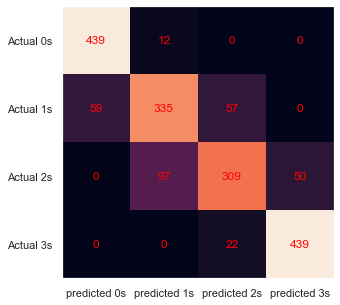

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, rf.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

442ta data k vaghean 0 bud model ham gofte 0, darvaghe 442 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

313ta data k vaghean 1 bud model ham gofte vaghean 1, 313 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

308ta data k vaghean 2 bud model ham gofte vaghean 2, 308 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

440ta data k vaghean 3 bud model ham gofte vaghean 3, 440 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

9ta data k vaghean 0 bud model ham gofte 1 , 9 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

73ta data k vaghean 1 bud model gofte 0 , 73 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


65ta data k vaghean 1 bud model ham gofte 2 , 65 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

81ta data k vaghean 2 bud model ham gofte 1 , 81 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


67ta data k vaghean 2 bud model ham gofte 3 , 67 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

21ta data k vaghean 3 bud model ham gofte 2 , 21 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 442+313+308+440=1503 tashkhis dorost va 9+73+65+81+67+21=316 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
### Visualization ###

In [ ]:
from sklearn import tree

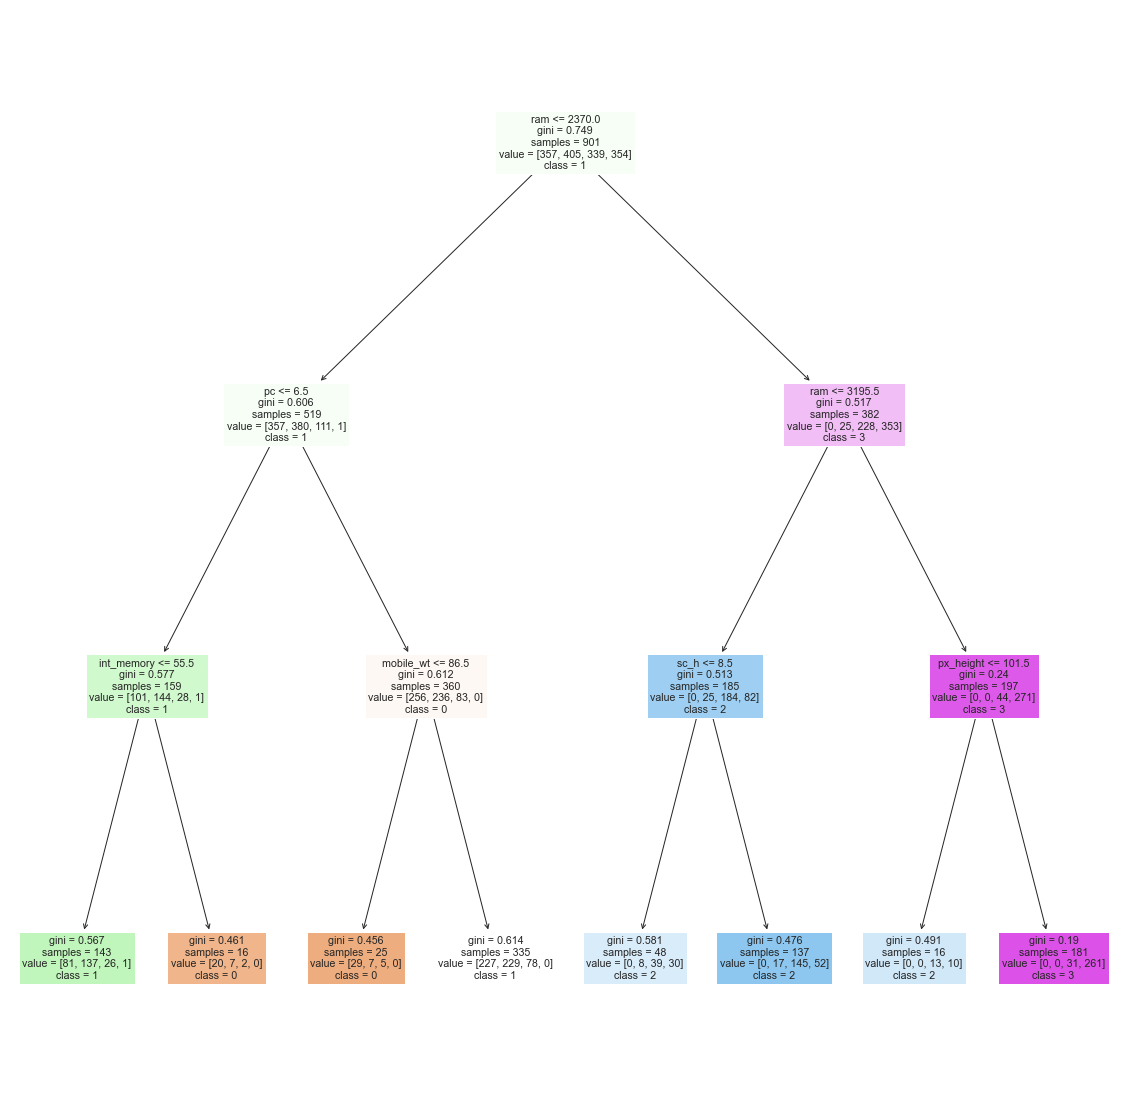

In [ ]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']
target_names = ['0', '1', '2', '3']
fig = plt.figure(figsize=(20,20))
plot = tree.plot_tree(rf.estimators_[5],
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)

fig.savefig("Tree1.png")

In [ ]:
#DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)    # ba method
dtc = dtc.fit(X_train, y_train)
y_train_pred2 = dtc.predict(X_train)
y_test_pred2 = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, y_train_pred2)
dtc_test_acc = accuracy_score(y_test, y_test_pred2)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred2,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred2, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred2, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred2, y_test)))

Train Set Accuracy:77.59450171821307
Test Set Accuracy:72.8021978021978

Confusion Matrix:
[[71  7  0  0]
 [19 74 25  0]
 [ 0  9 52 25]
 [ 0  0 14 68]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        78
           1       0.82      0.63      0.71       118
           2       0.57      0.60      0.59        86
           3       0.73      0.83      0.78        82

    accuracy                           0.73       364
   macro avg       0.73      0.74      0.73       364
weighted avg       0.74      0.73      0.73       364

MAE:  0.27197802197802196
MSE:  0.27197802197802196
R2 Score:  0.7589629708904109


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.79, recall=0.91, f1-score=0.85, support=78ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.82, recall=0.63, f1-score=0.71, support=118ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0.57, recall=0.60, f1-score=0.59, support=86ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.73, recall=0.83, f1-score=0.78, support=82ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 118>86>82>78

#accuracy price_range motevaset > geran > kheyli geran > arzan, 118>86>82>78

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 364taii "0.73%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

In [ ]:
# modelsazi ba DecisionTree daraye accuracy 73% ast.

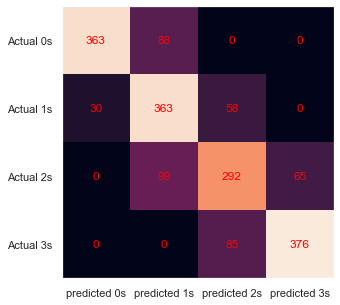

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, dtc.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

363ta data k vaghean 0 bud model ham gofte 0, darvaghe 363 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

363ta data k vaghean 1 bud model ham gofte vaghean 1, 363 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

292ta data k vaghean 2 bud model ham gofte vaghean 2, 292 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

376ta data k vaghean 3 bud model ham gofte vaghean 3, 376 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

88ta data k vaghean 0 bud model ham gofte 1 , 88 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

30ta data k vaghean 1 bud model gofte 0 , 30 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


58ta data k vaghean 1 bud model ham gofte 2 , 58 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

99ta data k vaghean 2 bud model ham gofte 1 , 99 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


65ta data k vaghean 2 bud model ham gofte 3 , 65 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

85ta data k vaghean 3 bud model ham gofte 2 , 85 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 363+363+292+376=1394 tashkhis dorost va 88+30+58+99+65+85=425 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [ ]:
dtc = grid_search.best_estimator_

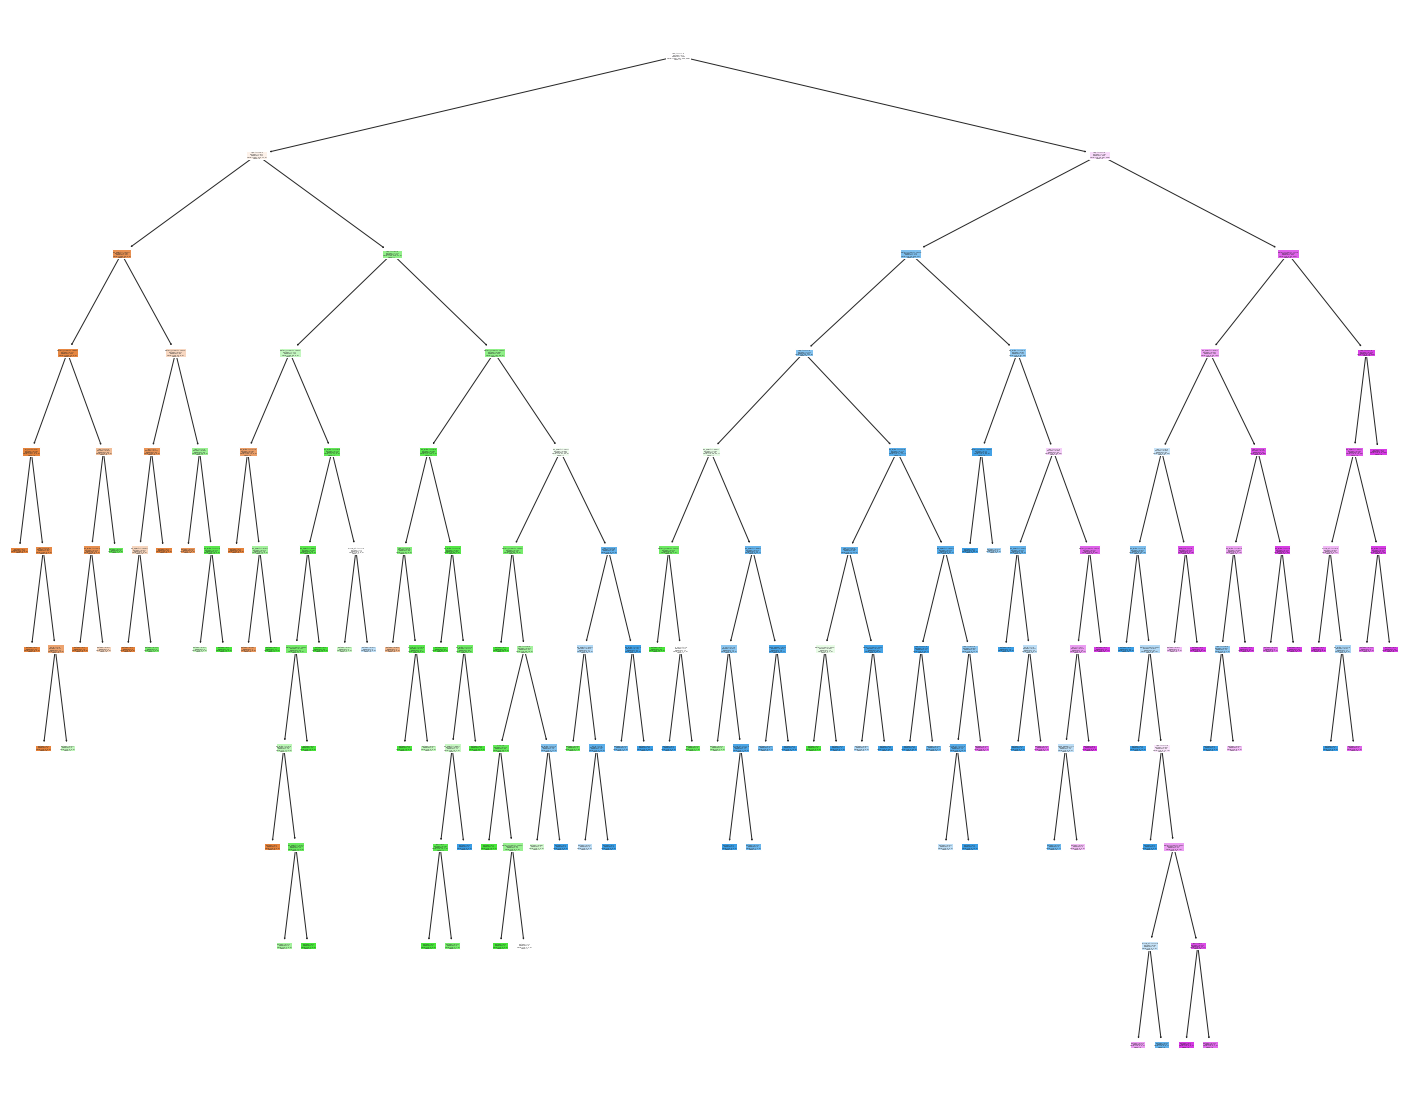

In [ ]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']
target_names = ['0', '1', '2', '3']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dtc,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)

fig.savefig("Tree2.png")

In [ ]:
from sklearn import tree

In [ ]:
text_represeptation = tree.export_text(dtc)  # tree ro az ketabkhane sklearn import karde budim, tavasote mazhule "export_text" modeli k sakhte budim "clf" ra export mikonim.
print(text_represeptation)

|--- feature_13 <= 2241.50
|   |--- feature_13 <= 1106.50
|   |   |--- feature_11 <= 1077.50
|   |   |   |--- feature_0 <= 1838.00
|   |   |   |   |--- feature_7 <= 0.75
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.75
|   |   |   |   |   |--- feature_13 <= 830.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  830.50
|   |   |   |   |   |   |--- feature_15 <= 6.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_15 >  6.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1838.00
|   |   |   |   |--- feature_13 <= 818.00
|   |   |   |   |   |--- feature_12 <= 1163.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_12 >  1163.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  818.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_11 >  1077.50
|   |   |   |--- feature_0 <= 1267.50
|   |   |   |   |--- feature_10 <= 4.50
|   |   

In [ ]:
# ba estefade az dasture zir text ra save mikonim.
with open("decision_tree.log", "w") as fout:
    fout.write(text_represeptation)

In [ ]:
#Model Selection and Tuning

In [ ]:
models = pd.DataFrame({
    'Model': ['SVC',  'Decision Tree Classifier','Random Forest Classifier'],
    'Score': [svc_rbf_acc, dtc_test_acc, rf_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.945055
2,Random Forest Classifier,0.799451
1,Decision Tree Classifier,0.728022


In [ ]:
# accuracy SVM > RF > DT ,    94% > 76% > 72%

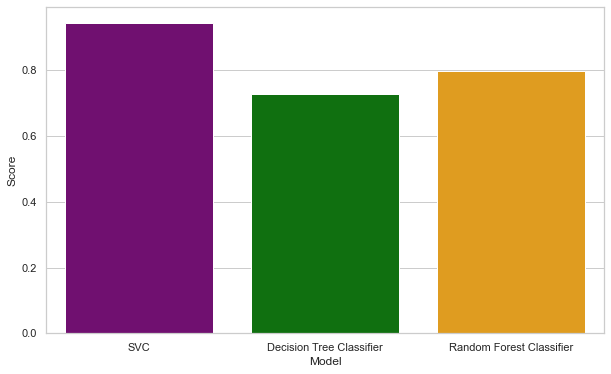

In [ ]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [ ]:
#### Data_test_model###

In [ ]:
# dataframe nemune jadid ra ba dadane maghadire jadid be features misazim

In [ ]:
data_train2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# dakhele data yek dataframe dorost mikonom k sari update beshe dar datafaram
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,1
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,1
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,1


In [ ]:
data_test.shape     # tedade satr va sotun

(1000, 21)

In [ ]:
data_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = pd.DataFrame(data_train2, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt',
                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
                   'wifi'])
data2=pd.DataFrame(data_test, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt',
                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
                   'wifi','price_range'])

In [ ]:
data3=data_train2.append(data2)      # dataframe jadid ra ba dataframe ghabli edgham mikonim
data3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,1


In [ ]:
data3.isnull().sum()   # barresi mojadad missing value featurs

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# data3 missing value nadarad

In [ ]:
#X_train va y_train  ra daste bandi konim

In [ ]:
X_train=data3[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt',
                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
                   'wifi']][:2818]     # az aval ta 4882 baraye train
y_train=data3[["price_range"]][:2818].values.reshape(-1,1)

In [ ]:
#X_test ra gharar midahim

In [ ]:
X_test=data3[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt',
                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
                   'wifi']][1818:]    #az 4882 ta akhar baraye test

In [ ]:
#modelsazi va fit kardane X_train, y_train dar model

In [ ]:
X = data3.drop('price_range', axis = 1)
Y = data3[['price_range']].values.reshape(-1,1)

In [ ]:
# train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
svc2 = SVC(kernel = 'rbf', random_state = 0)
svc2.fit(X_train,y_train)
y_train_pred3 = svc2.predict(X_train)
y_test_pred3 = svc2.predict(X_test)

svc2_acc=accuracy_score(y_test_pred3,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred3,y_test))
print("MAE: ", (metrics.mean_absolute_error(y_test_pred3, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_test_pred3, y_test)))
print("R2 Score: ", (metrics.r2_score(y_test_pred3, y_test)))

Train Set Accuracy:62.83813747228382
Test Set Accuracy:61.170212765957444

Confusion Matrix:
[[ 61  31   0   0]
 [ 29 222  91  30]
 [  0   0   0   0]
 [  0  38   0  62]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        92
           1       0.76      0.60      0.67       372
           2       0.00      0.00      0.00         0
           3       0.67      0.62      0.65       100

    accuracy                           0.61       564
   macro avg       0.53      0.47      0.50       564
weighted avg       0.73      0.61      0.67       564

MAE:  0.5088652482269503
MSE:  0.75
R2 Score:  0.10251895991332616


In [ ]:
#labelha 0 va 1 va 2 va 3

#baraye label 0 : precision=0.68, recall=0.66, f1-score=0.67, support=92ta data baraye 0 : yani gushihaii k daraye range gheymatiye "arzan" hastand.

#baraye label 1 : precision=0.76, recall=0.60, f1-score=0.67, support=373ta data baraye 1 : yani gushihaii k daraye range gheymatiye "motevaset" hastand.

#baraye label 2 : precision=0, recall=0, f1-score=0, support=0ta data baraye 1 : yani gushihaii k daraye range gheymatiye "geran" hastand.

#baraye label 3 : precision=0.67, recall=0.62, f1-score=0.65, support=4100ta data baraye 1 : yani gushihaii k daraye range gheymatiye "kheyli geran" hastand.

#model ruye gushihaye daraye range gheymati "motevaset" , deghat balatari darad chon tedad data bishtari darad. 372>100>92>0

#accuracy price_range motevaset > kheyli geran > arzan > geran, 372>100>92>0

#accuracy : bar asase f1-score ast.accuracy dakhele price_range 564taii "0.61%" ast.

# har che meghdare error kamtar va meghdare score bishtar bashad behtar ast.

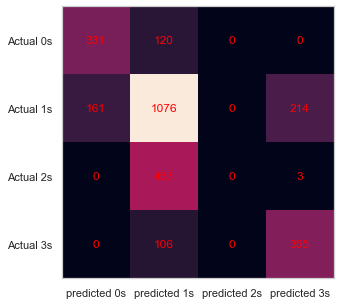

In [ ]:
#confusion_matrix plot
cm = confusion_matrix(Y, svc2.predict(X))
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)   #gridbandi ndashte bashad
#y_predict sutne aval 0 ha va sotun dovom 1ha(predict 0s va 1s)
ax.xaxis.set(ticks=(0,1,2,3), ticklabels=('predicted 0s', 'predicted 1s', 'predicted 2s', 'predicted 3s'))
#va dar y_Actual satre aval 0 ha va satre dovom 1
ax.yaxis.set(ticks=(0,1,2,3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)     #fasele nesbat be mehvare x va y
for i in range(4):         #tedad i ha 2ta ast
    for j in range(4):     #tedade j ha 2ta as
        ax.text(j, i, cm[i, j], ha ='center', va='center', color='red')
plt.show()

# tashkhise dorost actual va predict:

444ta data k vaghean 0 bud model ham gofte 0, darvaghe 444 gushi k price range "arzan" budand, model ham be dorosti tashkhis dade k range gheymatiyeshan "arzan" ast.

432ta data k vaghean 1 bud model ham gofte vaghean 1, 432 gushi k price range "motevaset" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "motevaset" ast.

410ta data k vaghean 2 bud model ham gofte vaghean 2, 410 gushi k price range "geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "geran" ast.

449ta data k vaghean 3 bud model ham gofte vaghean 3, 449 gushi k price range "kheyli geran" budand model ham be dorosti tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

# tashkhise eshtebah:

7ta data k vaghean 0 bud model ham gofte 1 , 7 gushi k price range "arzan" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.

12ta data k vaghean 1 bud model gofte 0 , 12 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "arzan" ast.


7ta data k vaghean 1 bud model ham gofte 2 , 7 gushi k price range "motevaset" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.

19ta data k vaghean 2 bud model ham gofte 1 , 19 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "motevaset" ast.


27ta data k vaghean 2 bud model ham gofte 3 , 27 gushi k price range "geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "kheyli geran" ast.

12ta data k vaghean 3 bud model ham gofte 2 , 12 gushi k price range "kheyli geran" budand model be eshtebah tashkhis dade k range gheymatiyeshan "geran" ast.


# barresiye tedade tashkhishaye dorost va eshtebahe model:

1819ta sample darim k 444+432+410+449=1735 tashkhis dorost va 12+7+7+19+12+27=84 tashkhise eshtebah

result : tedade tashkhishaye doroste model kheyli bishtar az tedade tashkhishaye eshtebahe model ast pas modele khubist.

In [ ]:
####################### END #######################